## Retrieving firms and creating firm list

#### Necessary Imports

In [2]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import yfinance as yf
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta

import warnings
warnings.filterwarnings("ignore")

### Loading List of Firms by Industry

In [3]:
metal = pd.read_csv("InputData/Metal.csv")
metal = metal.iloc[:17]
metal = metal[["Company", "Ticker"]]
metal_firm = metal["Ticker"].tolist()

In [4]:
energy = pd.read_csv("InputData/Energy.csv")
energy = energy[["HOLDINGS", "TICKER"]]
energy_firm = energy["TICKER"].tolist()

In [5]:
semi = pd.read_csv("InputData/Microchips.csv")
semi = semi.iloc[:38]
semi = semi[["Name", "Ticker"]]
semi_firm = semi["Ticker"].tolist()

In [6]:
trans = pd.read_csv("InputData/Transport.csv")
trans = trans.iloc[:47]
trans = trans[["Name", "Ticker"]]
trans_firm = trans["Ticker"].tolist()

In [7]:
food = pd.read_csv("InputData/Food.csv")
food = food[["SecurityName", "Identifier"]]
food_firm = food["Identifier"].tolist()

## Downloading stock prices for selected firms

In [8]:
start_date = datetime(2022, 2, 1)
end_date = datetime(2023, 4, 10)


metal_stocks = yf.download(metal_firm, start=start_date, end=end_date)
energy_stocks = yf.download(energy_firm,start=start_date,end=end_date)
semi_stocks = yf.download(semi_firm,start=start_date,end=end_date)
trans_stocks = yf.download(trans_firm,start=start_date,end=end_date)
food_stocks = yf.download(food_firm,start=start_date,end=end_date)

[*********************100%***********************]  17 of 17 completed
[*********************100%***********************]  112 of 112 completed
[*********************100%***********************]  38 of 38 completed
[*********************100%***********************]  47 of 47 completed
[*********************100%***********************]  30 of 30 completed


## Cleaning stock data converting to table

In [13]:
metal_prices = metal_stocks.filter(like='Adj Close')               
metal_prices.columns = metal_prices.columns.get_level_values(1)    
metal_prices =  metal_prices.stack().swaplevel().sort_index().reset_index()
metal_prices.columns = ['Firm','Date','Adj Close']

In [14]:
energy_prices = energy_stocks.filter(like='Adj Close')               
energy_prices.columns = energy_prices.columns.get_level_values(1)    
energy_prices =  energy_prices.stack().swaplevel().sort_index().reset_index()
energy_prices.columns = ['Firm','Date','Adj Close']

In [15]:
semi_prices = semi_stocks.filter(like='Adj Close')               
semi_prices.columns = semi_prices.columns.get_level_values(1)    
semi_prices =  semi_prices.stack().swaplevel().sort_index().reset_index()
semi_prices.columns = ['Firm','Date','Adj Close']

In [16]:
trans_prices = trans_stocks.filter(like='Adj Close')               
trans_prices.columns = trans_prices.columns.get_level_values(1)    
trans_prices =  trans_prices.stack().swaplevel().sort_index().reset_index()
trans_prices.columns = ['Firm','Date','Adj Close']

In [17]:
food_prices = food_stocks.filter(like='Adj Close')               
food_prices.columns = food_prices.columns.get_level_values(1)    
food_prices =  food_prices.stack().swaplevel().sort_index().reset_index()
food_prices.columns = ['Firm','Date','Adj Close']

## Calculating daily returns

In [18]:
metal_prices = metal_prices.sort_values(['Firm', 'Date'])
metal_prices['Daily Returns'] = metal_prices.groupby('Firm')['Adj Close'].pct_change()

In [19]:
energy_prices = energy_prices.sort_values(['Firm', 'Date'])
energy_prices['Daily Returns'] = energy_prices.groupby('Firm')['Adj Close'].pct_change()

In [20]:
semi_prices = semi_prices.sort_values(['Firm', 'Date'])
semi_prices['Daily Returns'] = semi_prices.groupby('Firm')['Adj Close'].pct_change()

In [21]:
trans_prices = trans_prices.sort_values(['Firm', 'Date'])
trans_prices['Daily Returns'] = trans_prices.groupby('Firm')['Adj Close'].pct_change()

In [22]:
food_prices = food_prices.sort_values(['Firm', 'Date'])
food_prices['Daily Returns'] = food_prices.groupby('Firm')['Adj Close'].pct_change()

## Downloading SP500 Returns - Market Returns

In [24]:
spy = yf.download('^GSPC', start=start_date, end=end_date)
market_ret = spy.filter(like='Adj Close')               
market_ret = market_ret.stack().swaplevel().sort_index().reset_index()
market_ret.columns = ['Firm','Date','Adj Close']
market_ret['Firm'] = "sp500"
market_ret['Daily Returns'] = market_ret['Adj Close'].pct_change()
market_ret.head(5)

[*********************100%***********************]  1 of 1 completed


Firm       Date    Adj Close  Daily Returns
0  sp500 2022-02-01  4546.540039            NaN
1  sp500 2022-02-02  4589.379883       0.009423
2  sp500 2022-02-03  4477.439941      -0.024391
3  sp500 2022-02-04  4500.529785       0.005157
4  sp500 2022-02-07  4483.870117      -0.003702

## Loading Data of Major Events in the War

In [25]:
event_dates = pd.read_csv("InputData/MajorEvents.csv")
event_dates['Date'] = pd.to_datetime(event_dates['Date'])
event_dates

Date                                           Event
0  2022-02-24                           Invasion Announcement
1  2022-02-25  Ukraine announces it will defend its territory
2  2022-03-02                        Refugee Crisis in Poland
3  2022-03-06                         Irpin Bridge Evacuation
4  2022-03-09                        Mariupol Hospital Attack
5  2022-03-16                        Mariupol Theater Bombing
6  2022-04-01                            War crimes uncovered
7  2022-04-14                    Sunking of Russian main ship
8  2022-05-17                    Mariupol Steel Plant Defence
9  2022-09-01                    Russian retreat from Kharkiv
10 2022-09-21                      Russia starts mobilization
11 2022-10-08                            Crimea Bridge Attack
12 2022-10-10                                   Kyiv Blackout
13 2022-11-12                         Kherson city liberation
14 2022-12-21                     Zelensky visits White House
15 2023-01-25                             Germany sends tanks
16 2023-02-20                               Biden visits Kyiv

## Calculation of excess returns for each firms in the industries

In [31]:
metal_excess_returns = metal_prices.groupby(['Firm', 'Date'])['Daily Returns'].mean() - market_ret.set_index('Date')['Daily Returns']
metal_excess_returns = metal_excess_returns.reset_index()
metal_excess_returns = metal_excess_returns.rename(columns={'Daily Returns': 'Excess Returns'})
metal_excess_returns["Industry"] = "Metal"

In [32]:
energy_excess_returns = energy_prices.groupby(['Firm', 'Date'])['Daily Returns'].mean() - market_ret.set_index('Date')['Daily Returns']
energy_excess_returns = energy_excess_returns.reset_index()
energy_excess_returns = energy_excess_returns.rename(columns={'Daily Returns': 'Excess Returns'})
energy_excess_returns["Industry"] = "Energy"

In [33]:
semi_excess_returns = semi_prices.groupby(['Firm', 'Date'])['Daily Returns'].mean() - market_ret.set_index('Date')['Daily Returns']
semi_excess_returns = semi_excess_returns.reset_index()
semi_excess_returns = semi_excess_returns.rename(columns={'Daily Returns': 'Excess Returns'})
semi_excess_returns["Industry"] = "Semiconductor"

In [34]:
trans_excess_returns = trans_prices.groupby(['Firm', 'Date'])['Daily Returns'].mean() - market_ret.set_index('Date')['Daily Returns']
trans_excess_returns = trans_excess_returns.reset_index()
trans_excess_returns = trans_excess_returns.rename(columns={'Daily Returns': 'Excess Returns'})
trans_excess_returns["Industry"] = "Transport"

In [35]:
food_excess_returns = food_prices.groupby(['Firm', 'Date'])['Daily Returns'].mean() - market_ret.set_index('Date')['Daily Returns']
food_excess_returns = food_excess_returns.reset_index()
food_excess_returns = food_excess_returns.rename(columns={'Daily Returns': 'Excess Returns'})
food_excess_returns["Industry"] = "Food"
food_excess_returns.head(5)

Firm       Date  Excess Returns Industry
0  ADM 2022-02-01             NaN     Food
1  ADM 2022-02-02        0.005936     Food
2  ADM 2022-02-03        0.011091     Food
3  ADM 2022-02-04       -0.004628     Food
4  ADM 2022-02-07        0.012598     Food

In [37]:
# Concatenate dataframes vertically
big_df = pd.concat([food_excess_returns, trans_excess_returns, semi_excess_returns, energy_excess_returns, metal_excess_returns])
big_df = big_df.reset_index(drop=True)

In [60]:
big_df["Industry"].unique()

array(['Food', 'Transport', 'Semiconductor', 'Energy', 'Metal'],
      dtype=object)

In [56]:
pd.options.display.max_rows = 1000

In [58]:
event_ret_df = pd.DataFrame()
industries = ['Food', 'Transport', 'Semiconductor', 'Energy', 'Metal']
for index, row in event_dates.iterrows():
    event = row['Event']
    date = row['Date']
    # Define the start and end dates for the subset
    start_date = pd.to_datetime(date) - pd.Timedelta(days=20)
    end_date = pd.to_datetime(date) + pd.Timedelta(days=20)

    for industry in industries:
        sub_df = big_df.query("Date >= @start_date and Date <= @end_date")
        sub_df_cum = sub_df.assign(R=1+sub_df['Excess Returns']).assign(cumret=lambda x: x.groupby(['Firm'])['R'].cumprod()).groupby(['Date'])['cumret'].mean().reset_index(name='Cum_ret')
        sub_df_cum["Event"] = event
        sub_df_cum["EventDate"] = date
        sub_df_cum["Industry"] = industry
        event_ret_df = pd.concat([event_ret_df, sub_df_cum])

event_ret_df["Cum_ret"] = event_ret_df["Cum_ret"] - 1
event_ret_df

Date   Cum_ret                                           Event   
0  2022-02-04  0.002835                           Invasion Announcement  \
1  2022-02-07  0.009059                           Invasion Announcement   
2  2022-02-08  0.004729                           Invasion Announcement   
3  2022-02-09  0.014205                           Invasion Announcement   
4  2022-02-10  0.021322                           Invasion Announcement   
5  2022-02-11  0.047507                           Invasion Announcement   
6  2022-02-14  0.041384                           Invasion Announcement   
7  2022-02-15  0.043502                           Invasion Announcement   
8  2022-02-16  0.044325                           Invasion Announcement   
9  2022-02-17  0.052763                           Invasion Announcement   
10 2022-02-18  0.048355                           Invasion Announcement   
11 2022-02-22  0.046642                           Invasion Announcement   
12 2022-02-23  0.060190                           Invasion Announcement   
13 2022-02-24  0.064128                           Invasion Announcement   
14 2022-02-25  0.065340                           Invasion Announcement   
15 2022-02-28  0.088094                           Invasion Announcement   
16 2022-03-01  0.095746                           Invasion Announcement   
17 2022-03-02  0.106384                           Invasion Announcement   
18 2022-03-03  0.105147                           Invasion Announcement   
19 2022-03-04  0.122650                           Invasion Announcement   
20 2022-03-07  0.144731                           Invasion Announcement   
21 2022-03-08  0.166310                           Invasion Announcement   
22 2022-03-09  0.141787                           Invasion Announcement   
23 2022-03-10  0.161238                           Invasion Announcement   
24 2022-03-11  0.157234                           Invasion Announcement   
25 2022-03-14  0.123841                           Invasion Announcement   
26 2022-03-15  0.105072                           Invasion Announcement   
27 2022-03-16  0.102589                           Invasion Announcement   
0  2022-02-07  0.006299  Ukraine announces it will defend its territory   
1  2022-02-08  0.002047  Ukraine announces it will defend its territory   
2  2022-02-09  0.011287  Ukraine announces it will defend its territory   
3  2022-02-10  0.018363  Ukraine announces it will defend its territory   
4  2022-02-11  0.044343  Ukraine announces it will defend its territory   
5  2022-02-14  0.038340  Ukraine announces it will defend its territory   
6  2022-02-15  0.040252  Ukraine announces it will defend its territory   
7  2022-02-16  0.041182  Ukraine announces it will defend its territory   
8  2022-02-17  0.049592  Ukraine announces it will defend its territory   
9  2022-02-18  0.045480  Ukraine announces it will defend its territory   
10 2022-02-22  0.043799  Ukraine announces it will defend its territory   
11 2022-02-23  0.057188  Ukraine announces it will defend its territory   
12 2022-02-24  0.060872  Ukraine announces it will defend its territory   
13 2022-02-25  0.062174  Ukraine announces it will defend its territory   
14 2022-02-28  0.084334  Ukraine announces it will defend its territory   
15 2022-03-01  0.091823  Ukraine announces it will defend its territory   
16 2022-03-02  0.102306  Ukraine announces it will defend its territory   
17 2022-03-03  0.101230  Ukraine announces it will defend its territory   
18 2022-03-04  0.118452  Ukraine announces it will defend its territory   
19 2022-03-07  0.139938  Ukraine announces it will defend its territory   
20 2022-03-08  0.160888  Ukraine announces it will defend its territory   
21 2022-03-09  0.136669  Ukraine announces it will defend its territory   
22 2022-03-10  0.155789  Ukraine announces it will defend its territory   
23 2022-03-11  0.151895  Ukraine announces it will defend its territory   
24 2022-03-14  0.119378  Ukraine a

In [ ]:
pd.set_option()

## Calculation of cumulative returns (by dates) in the industries

In [25]:
metal_cum = metal_excess_returns.assign(R=1+metal_excess_returns['Excess Returns']).assign(cumret=lambda x: x.groupby(['Firm'])['R'].cumprod()).groupby(['Date'])['cumret'].mean().reset_index(name='Cum_ret')
metal_cum["Cum_ret"] = metal_cum["Cum_ret"] -1

In [26]:
energy_cum = energy_excess_returns.assign(R=1+energy_excess_returns['Excess Returns']).assign(cumret = lambda x: x.groupby(['Firm'])['R'].cumprod()).groupby(['Date'])['cumret'].mean().reset_index(name='Cum_ret')
energy_cum["Cum_ret"] = energy_cum["Cum_ret"] -1

In [27]:
semi_cum = semi_excess_returns.assign(R=1+semi_excess_returns['Excess Returns']).assign(cumret = lambda x: x.groupby(['Firm'])['R'].cumprod()).groupby(['Date'])['cumret'].mean().reset_index(name='Cum_ret')
semi_cum["Cum_ret"] = semi_cum["Cum_ret"] -1

In [28]:
trans_cum = trans_excess_returns.assign(R=1+trans_excess_returns['Excess Returns']).assign(cumret = lambda x: x.groupby(['Firm'])['R'].cumprod()).groupby(['Date'])['cumret'].mean().reset_index(name='Cum_ret')
trans_cum["Cum_ret"] = trans_cum["Cum_ret"] -1

In [29]:
food_cum = food_excess_returns.assign(R=1+food_excess_returns['Excess Returns']).assign(cumret = lambda x: x.groupby(['Firm'])['R'].cumprod()).groupby(['Date'])['cumret'].mean().reset_index(name='Cum_ret')
food_cum["Cum_ret"] = food_cum["Cum_ret"] -1
food_cum.head(7)

Date   Cum_ret
0 2022-02-01       NaN
1 2022-02-02 -0.004310
2 2022-02-03  0.013233
3 2022-02-04 -0.006031
4 2022-02-07  0.009154
5 2022-02-08  0.010792
6 2022-02-09 -0.000507

## Merging Datasets Cumulative Returns Datasets

In [30]:
# assume the individual data frames are already loaded and have the same structure
dfs = [metal_cum, energy_cum, semi_cum, trans_cum, food_cum]

# create a list of industry names
industries = ['Metal', 'Energy', 'Semiconductor', 'Transport', 'Food']

# merge the data frames on the Date column
merged_df = pd.concat([df.set_index('Date') for df in dfs], axis=1, keys=industries)
merged_df = merged_df.reset_index()

# rename the columns to remove the multi-level index
merged_df.columns = ['Date'] + industries
print(merged_df.head(5))
merged_df.to_csv("OutputData/final.csv")

        Date     Metal    Energy  Semiconductor  Transport      Food
0 2022-02-01       NaN       NaN            NaN        NaN       NaN
1 2022-02-02  0.006228 -0.011870       0.003009  -0.013878 -0.004310
2 2022-02-03  0.023661 -0.006030      -0.025375  -0.010458  0.013233
3 2022-02-04  0.021337  0.008442      -0.016174  -0.025756 -0.006031
4 2022-02-07  0.028576  0.008543      -0.010417  -0.011696  0.009154


## Plotting Cumulative Returns For Every Event For Every Industry

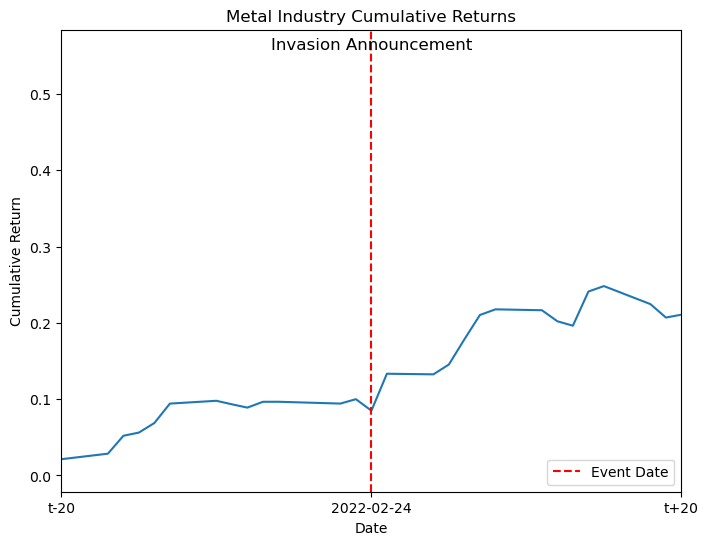

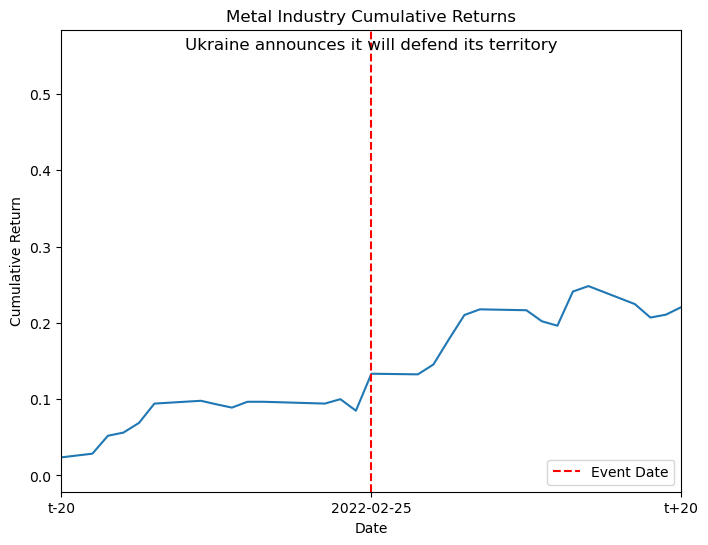

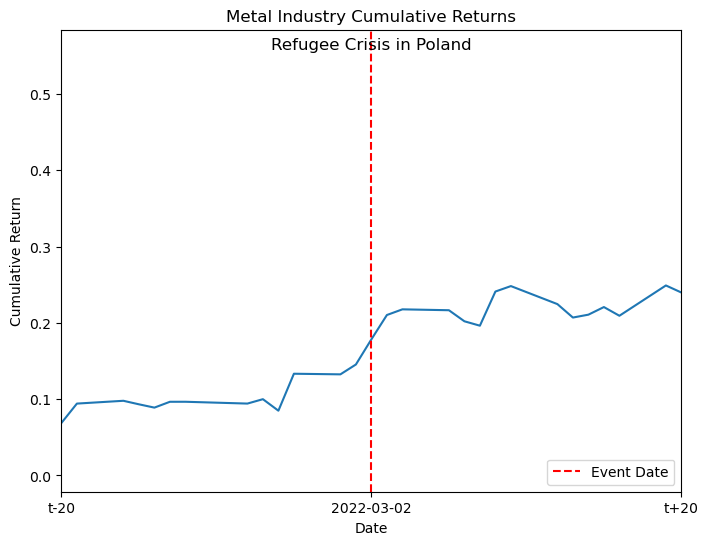

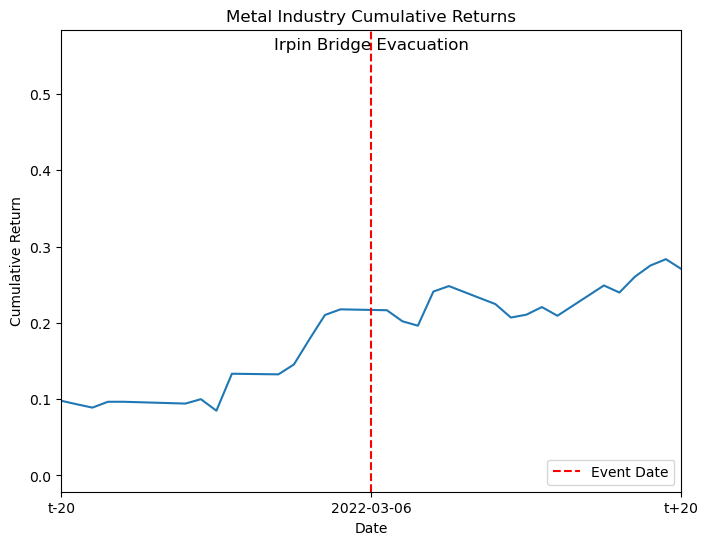

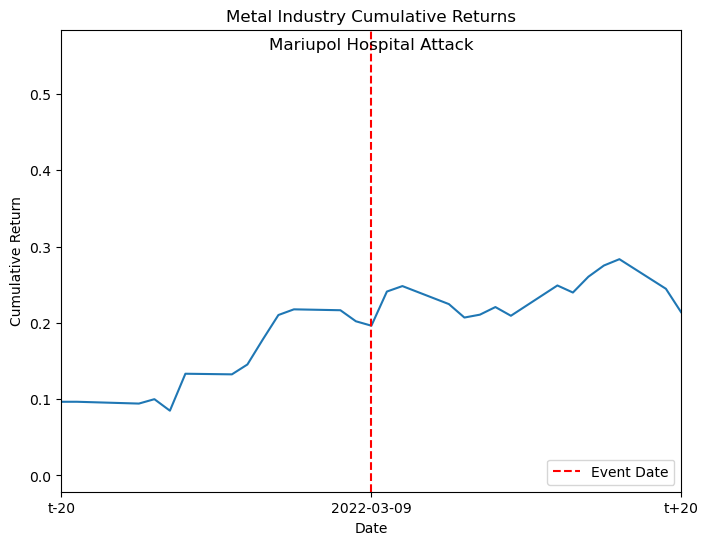

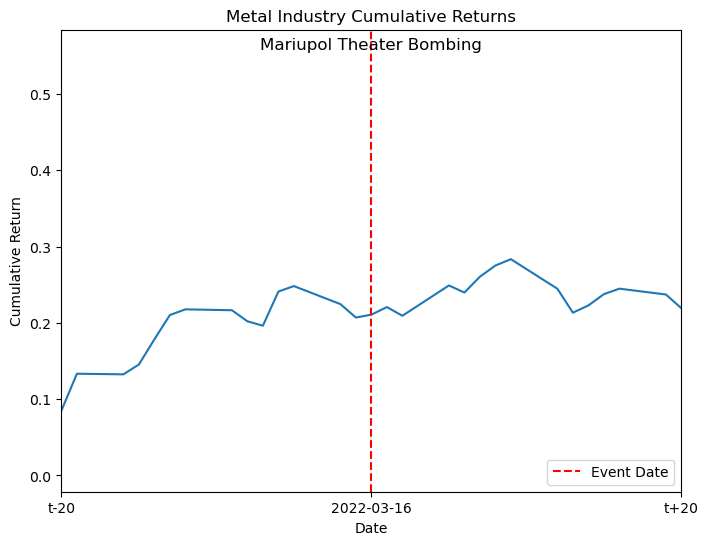

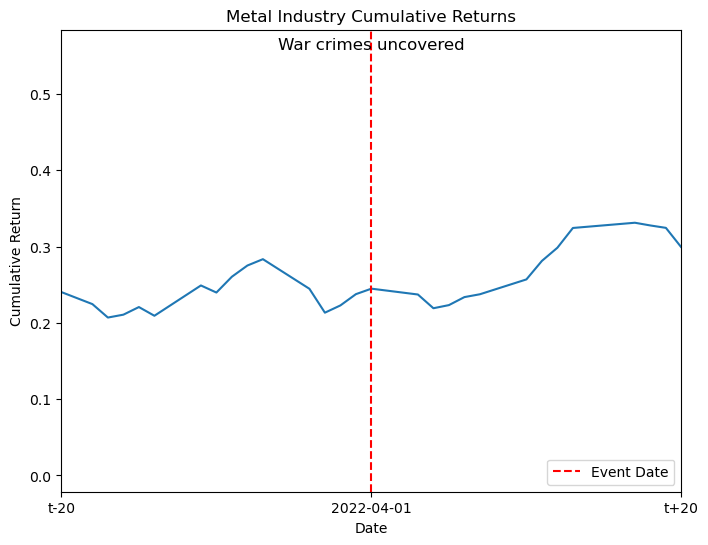

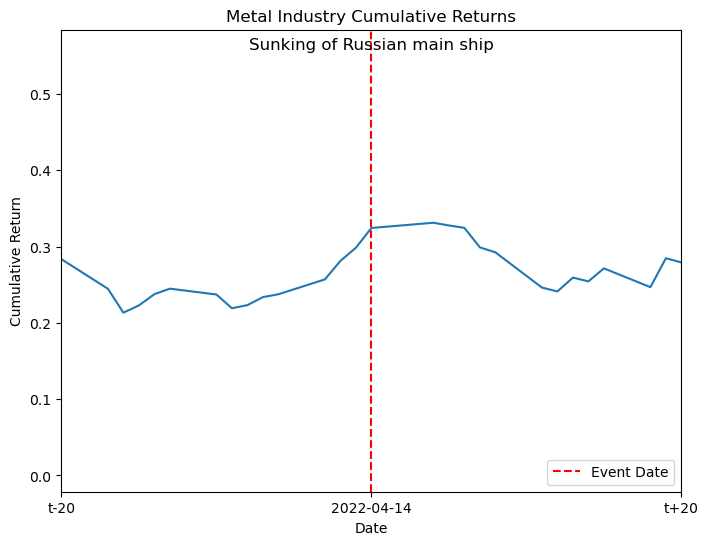

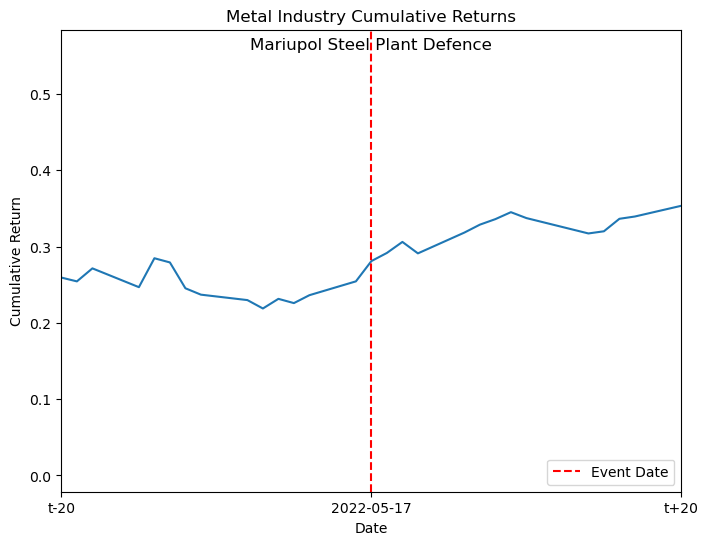

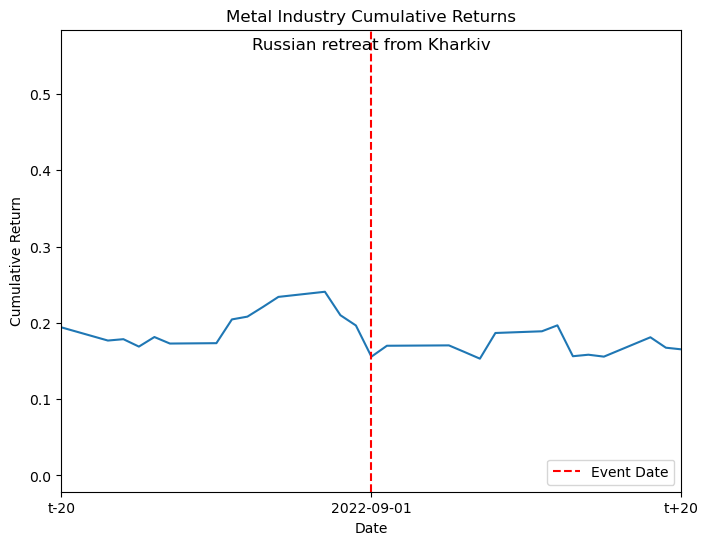

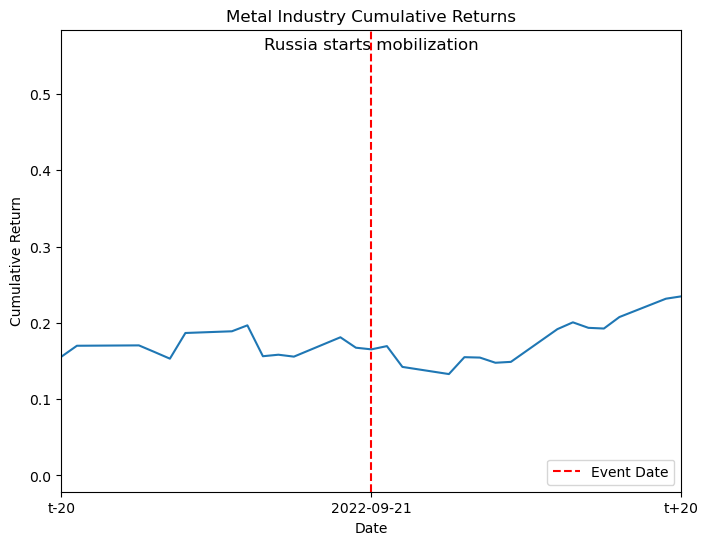

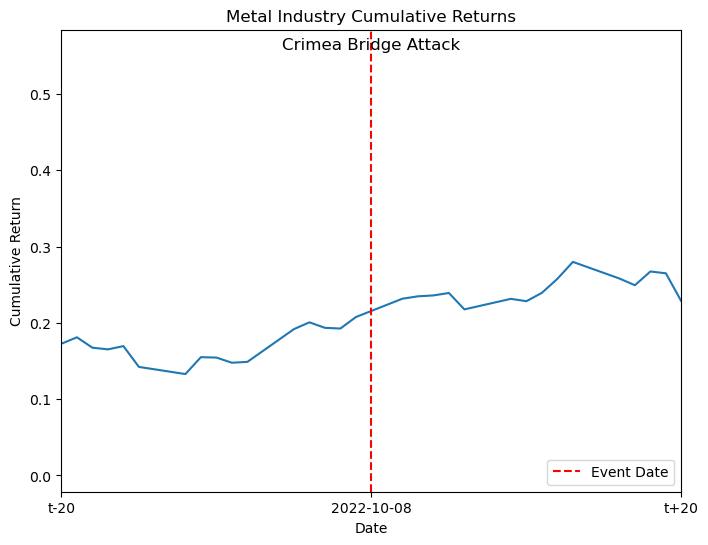

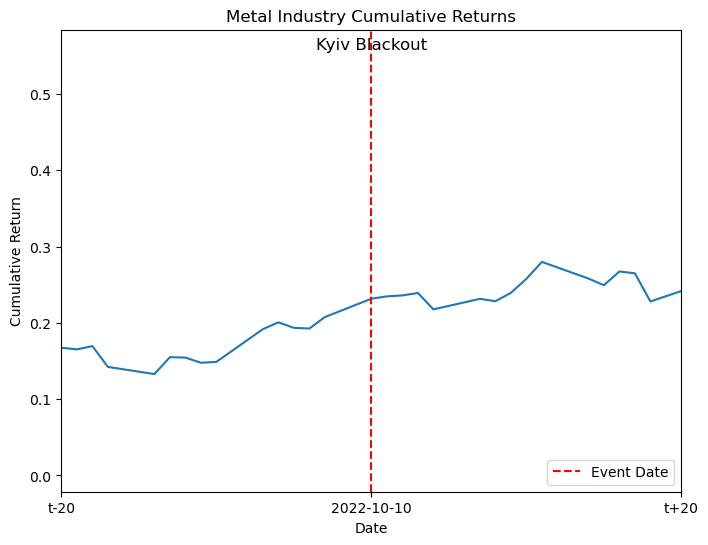

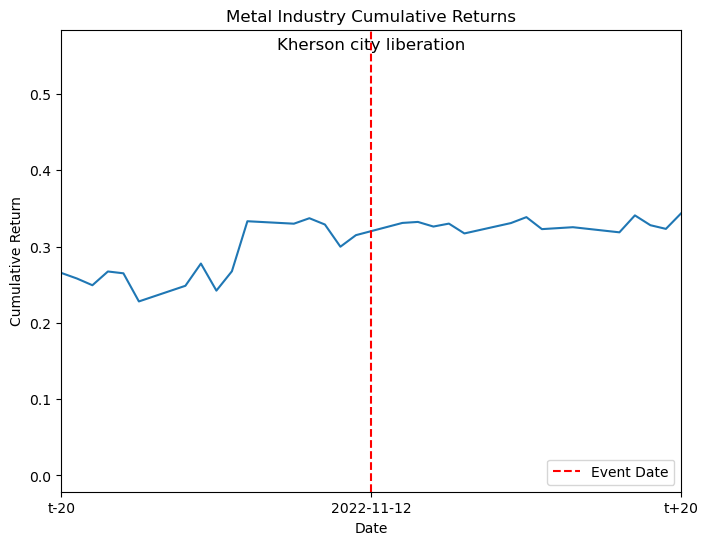

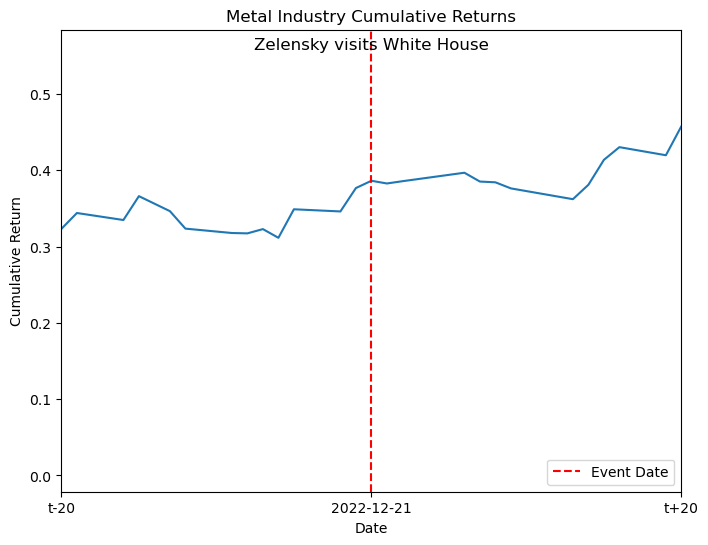

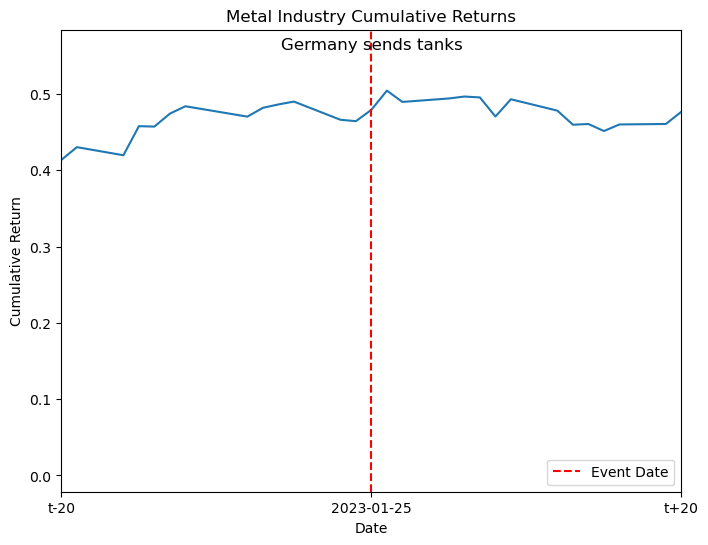

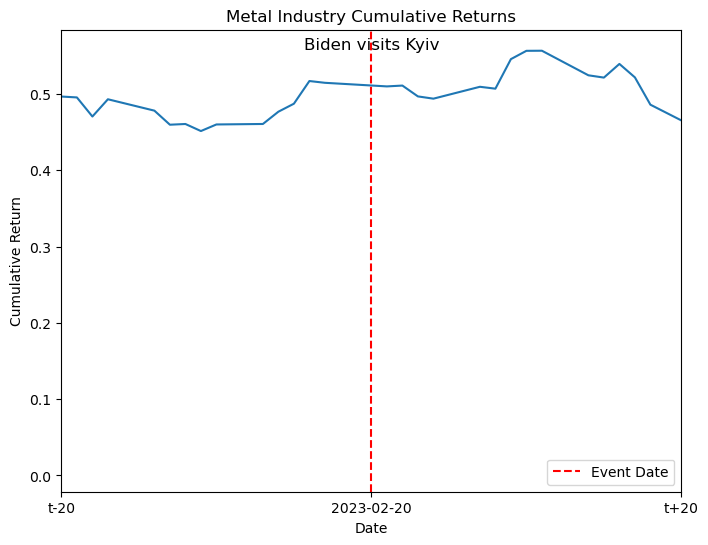

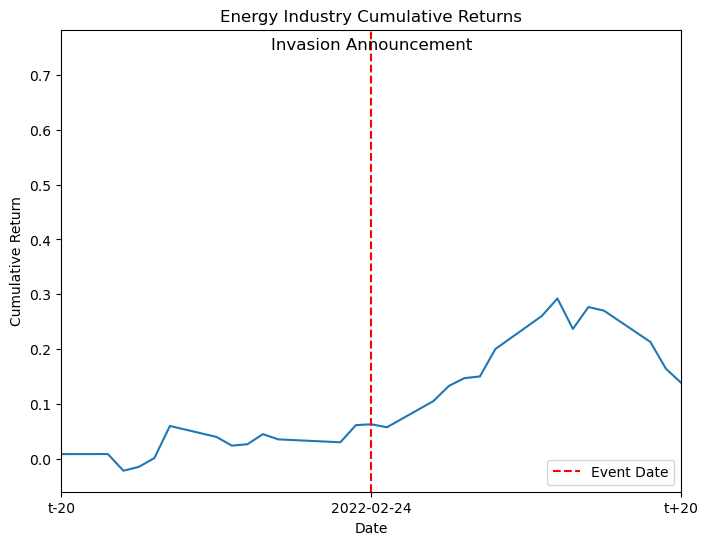

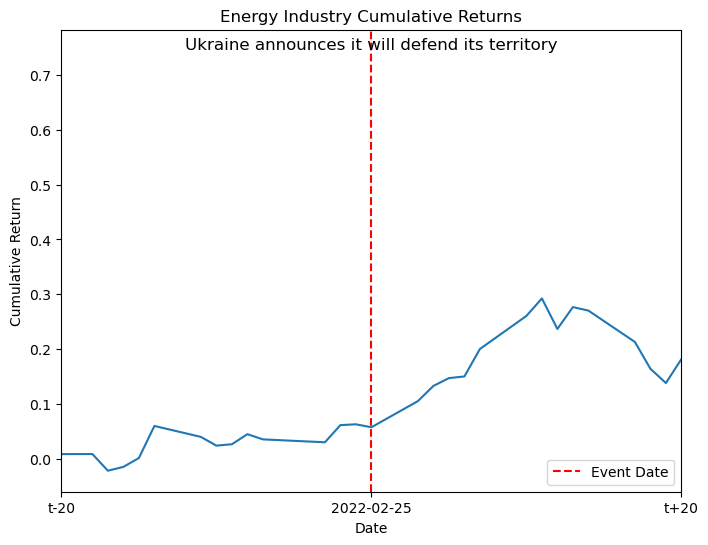

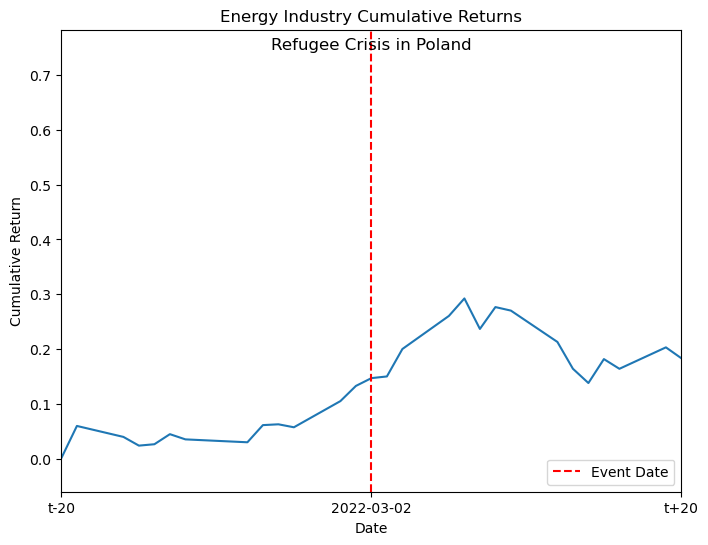

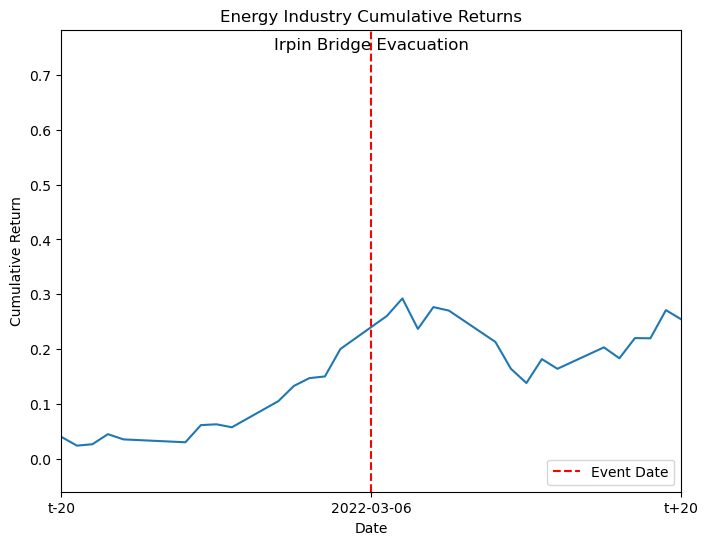

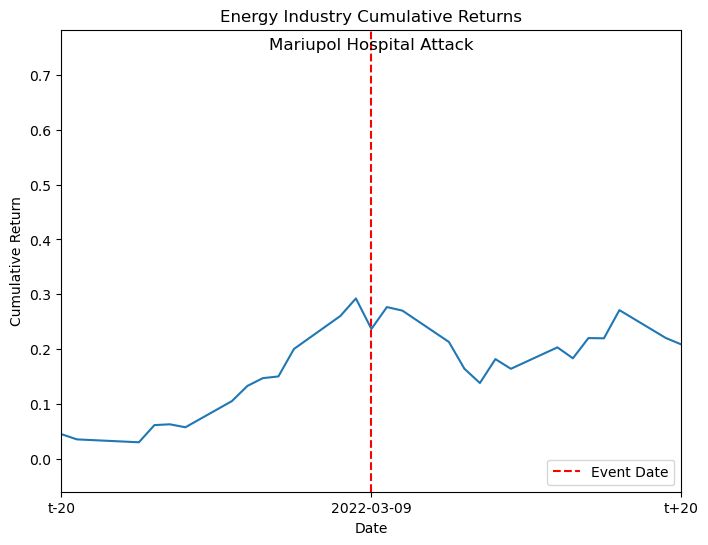

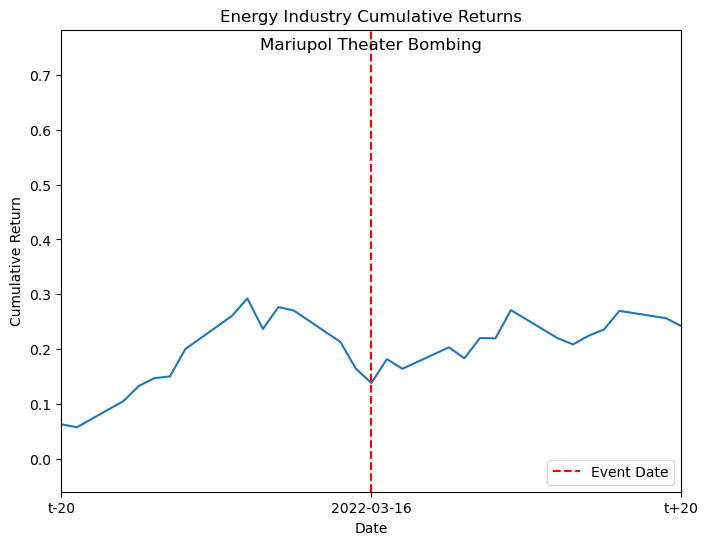

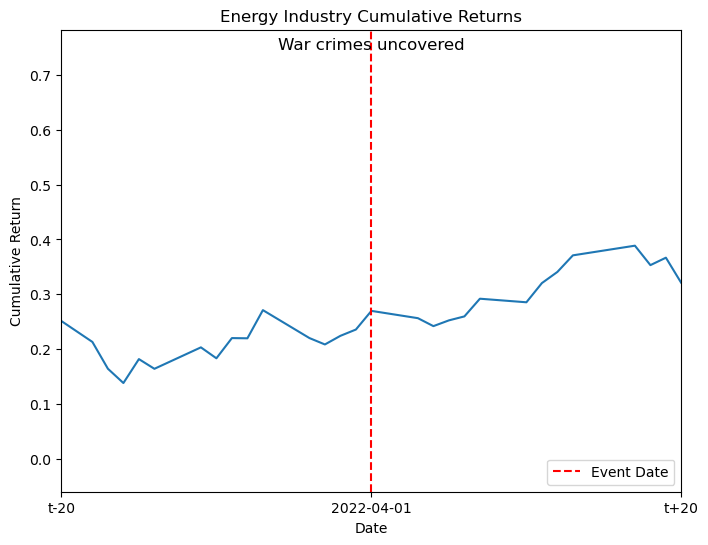

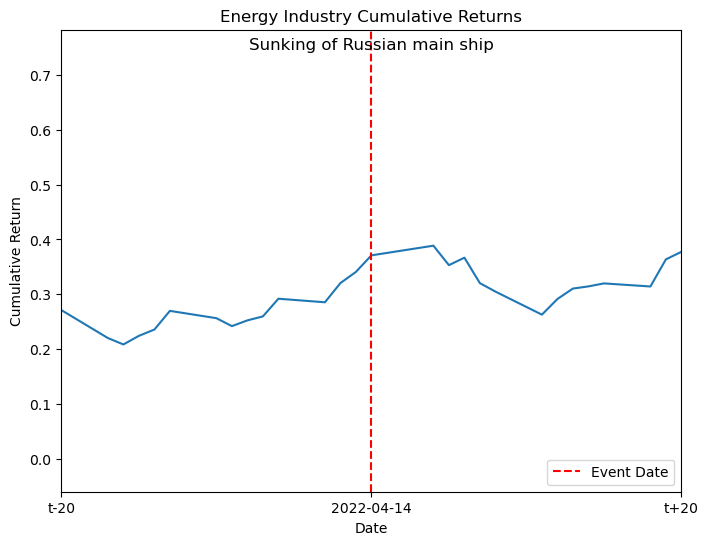

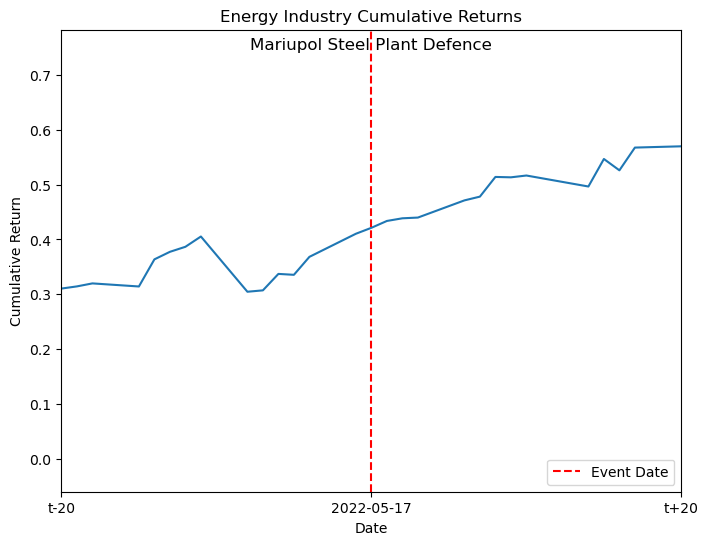

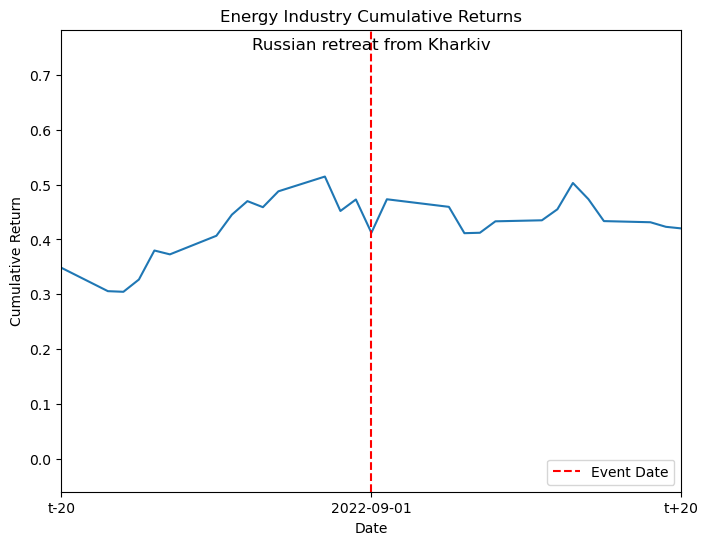

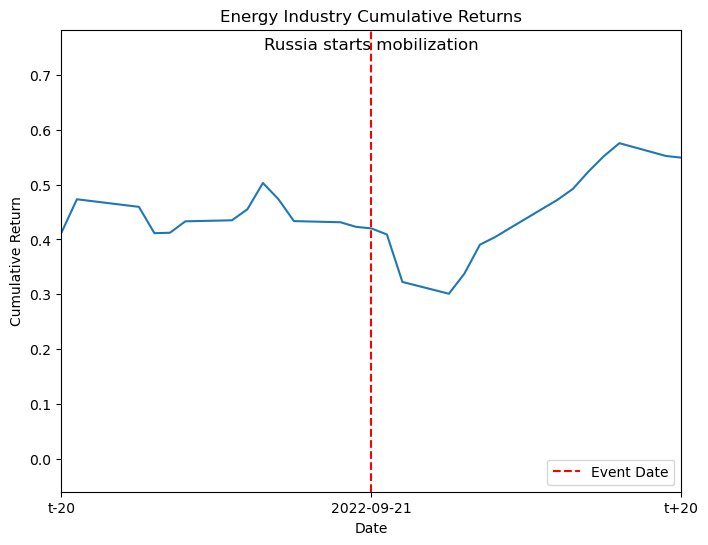

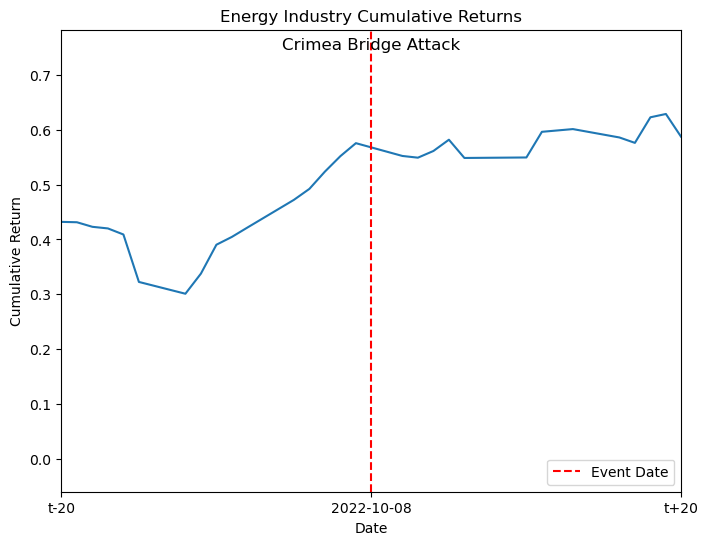

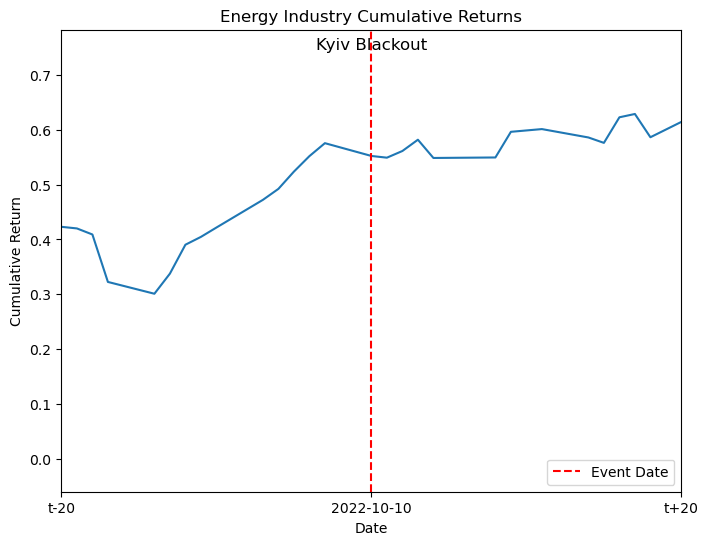

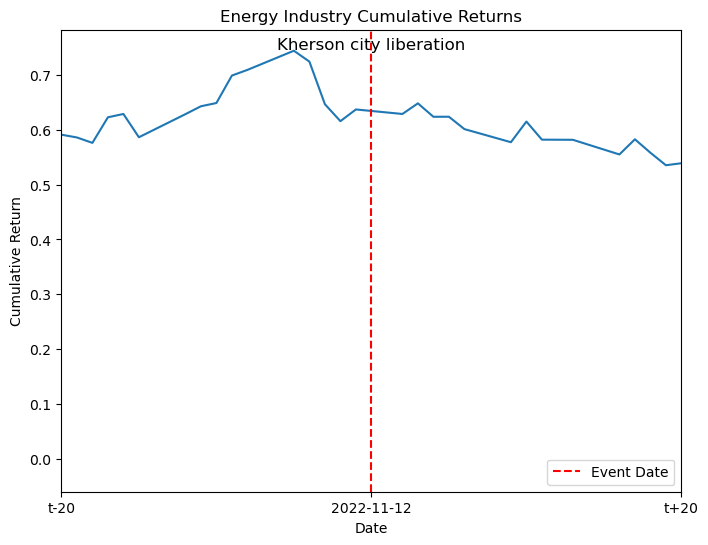

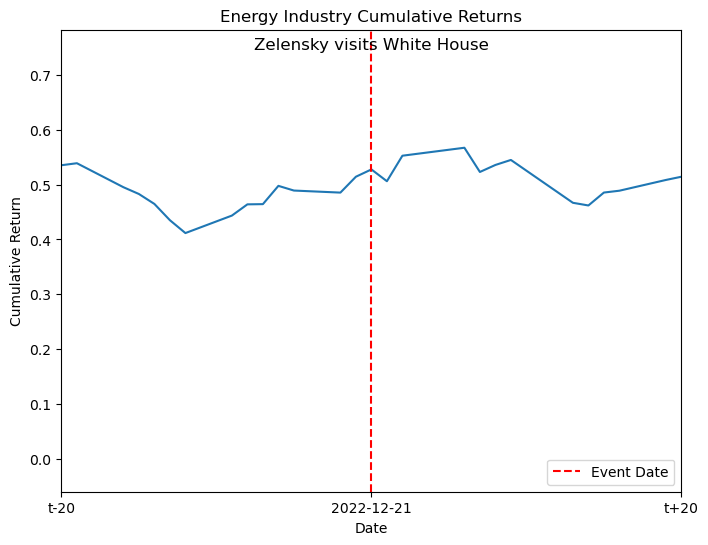

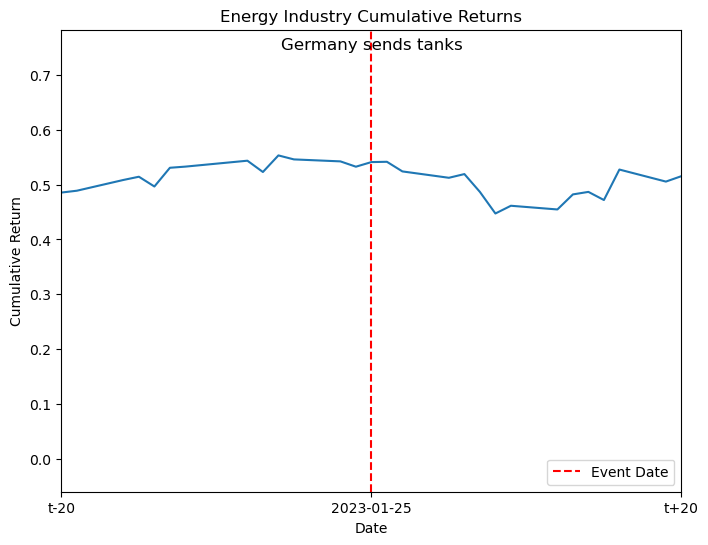

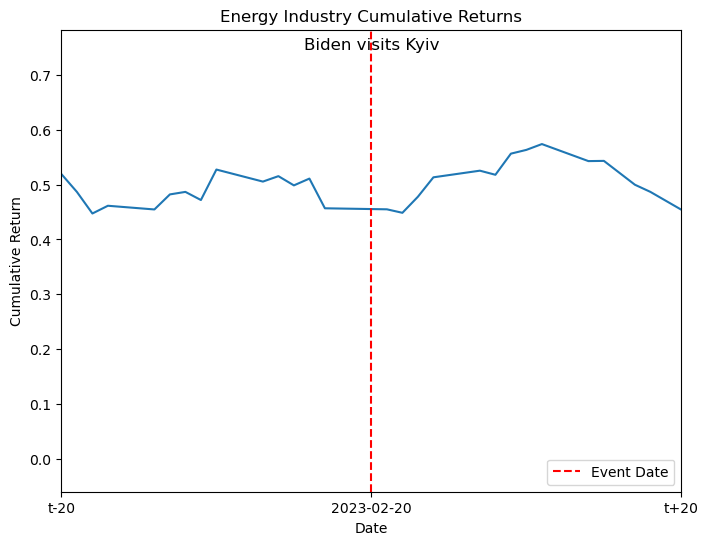

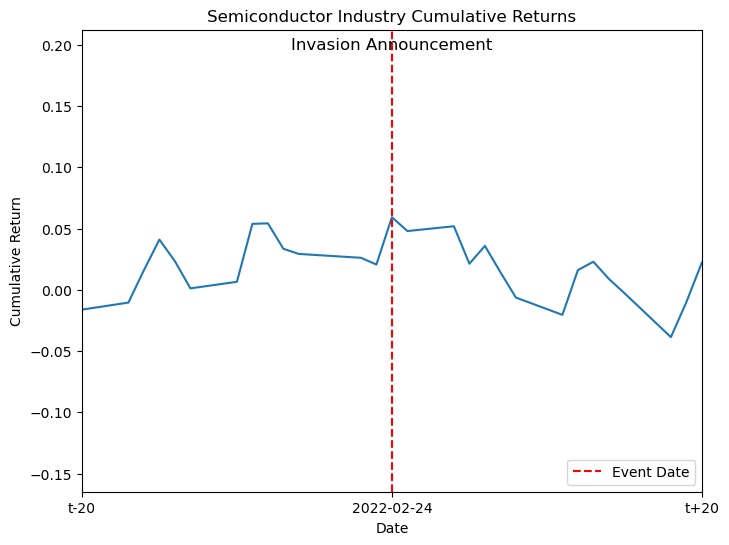

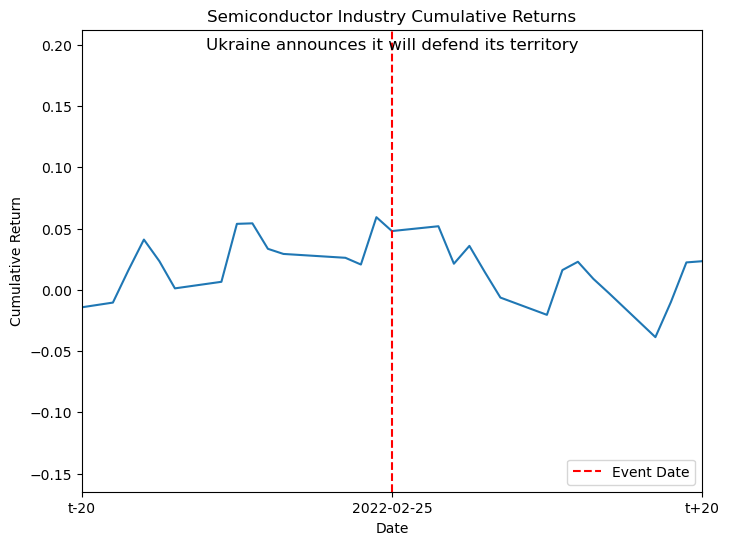

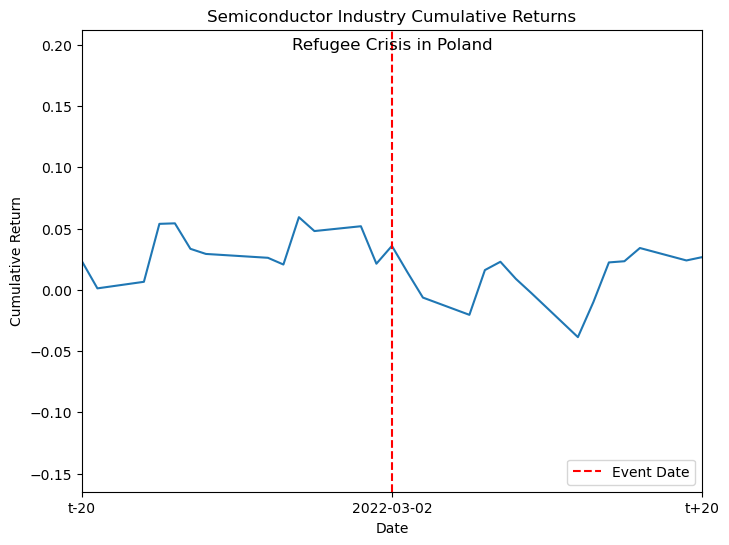

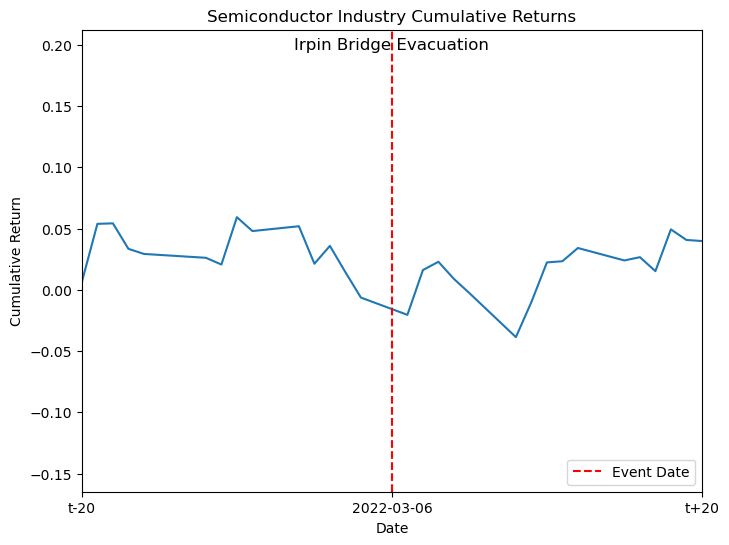

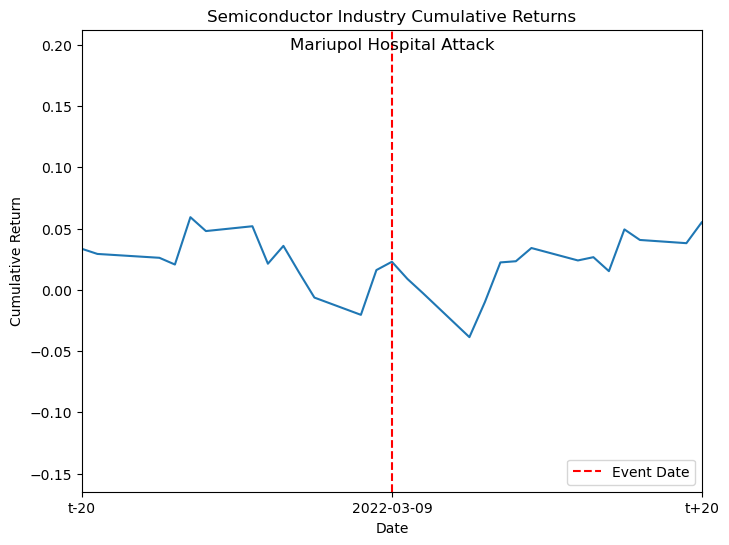

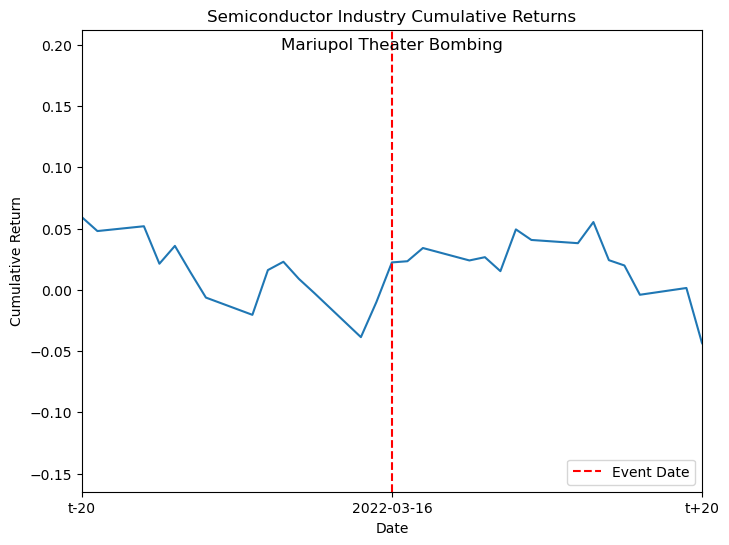

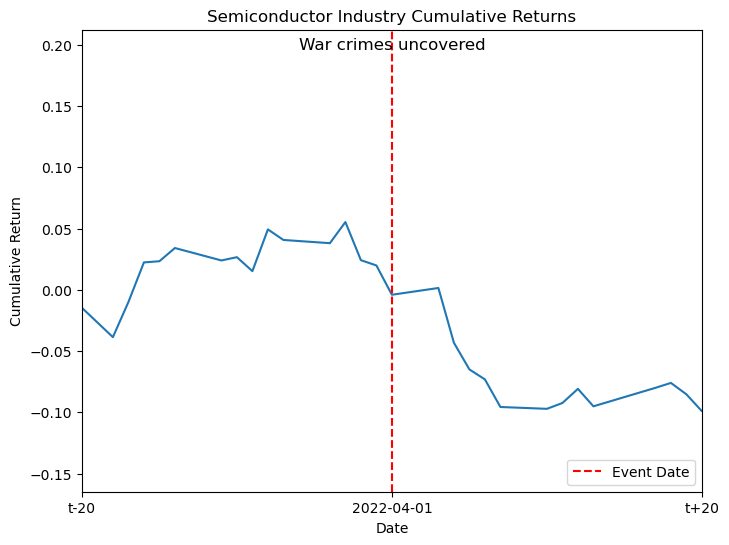

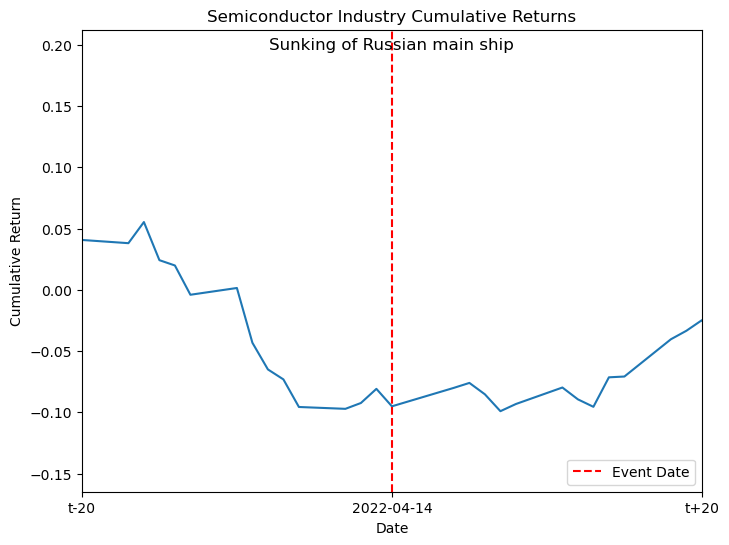

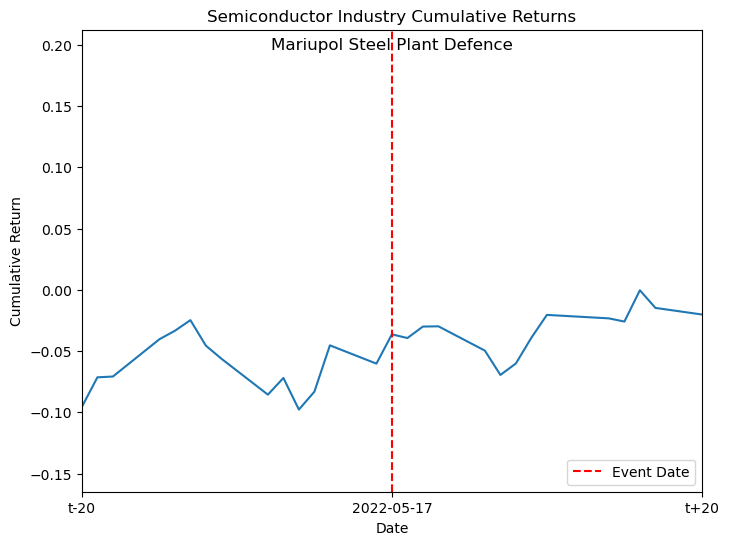

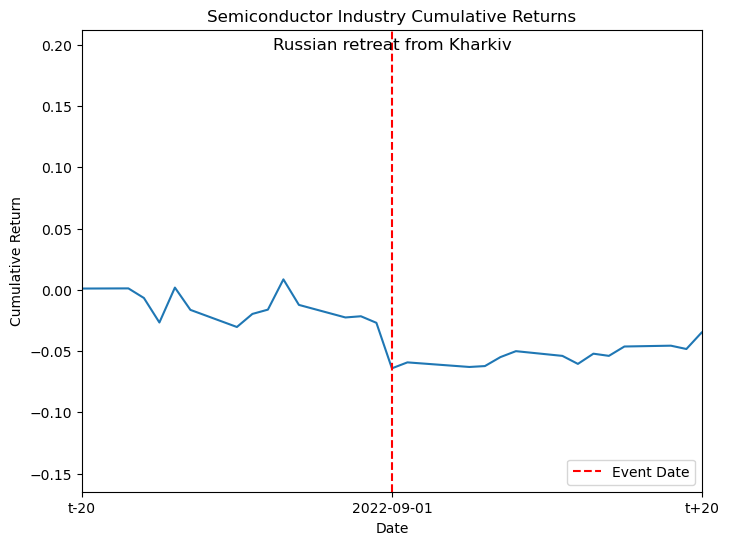

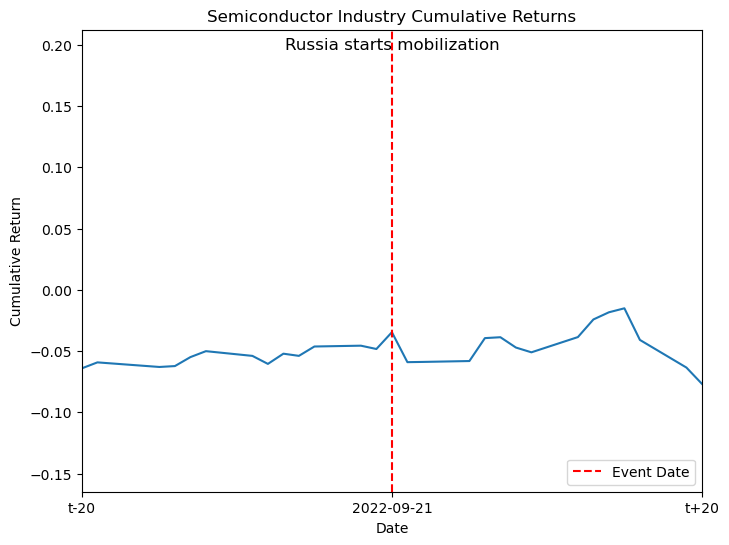

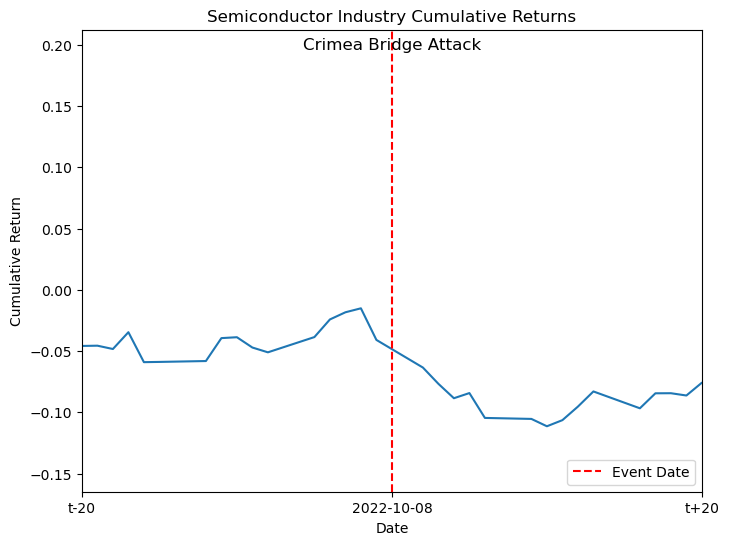

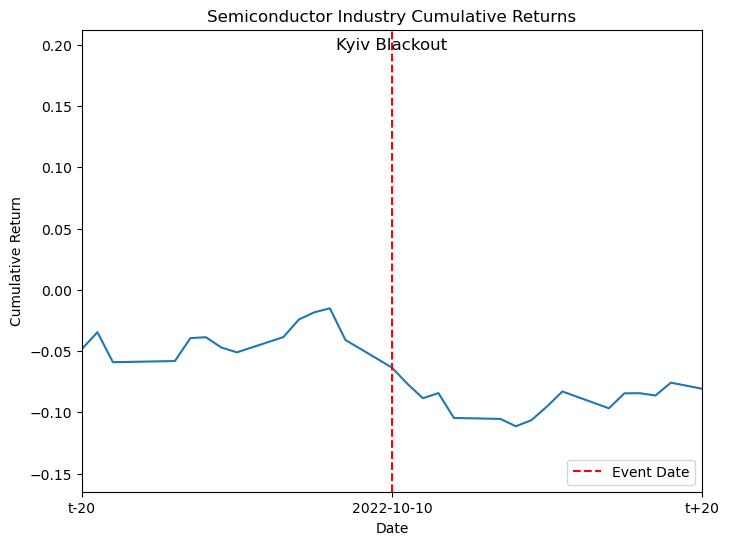

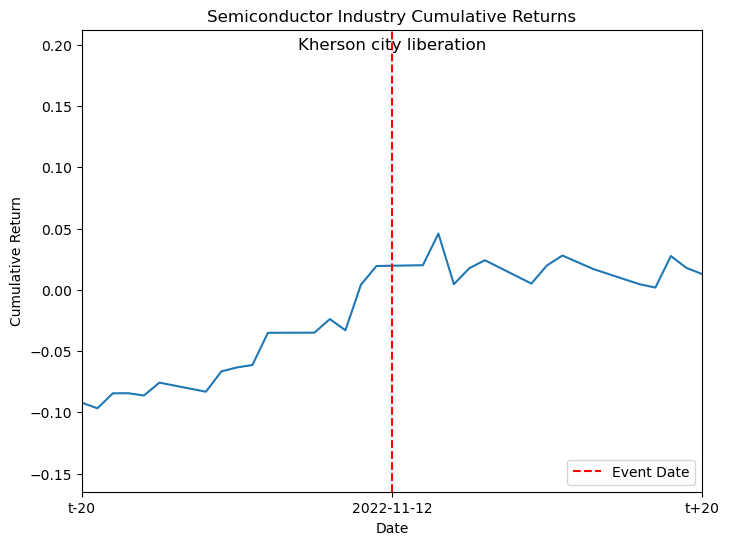

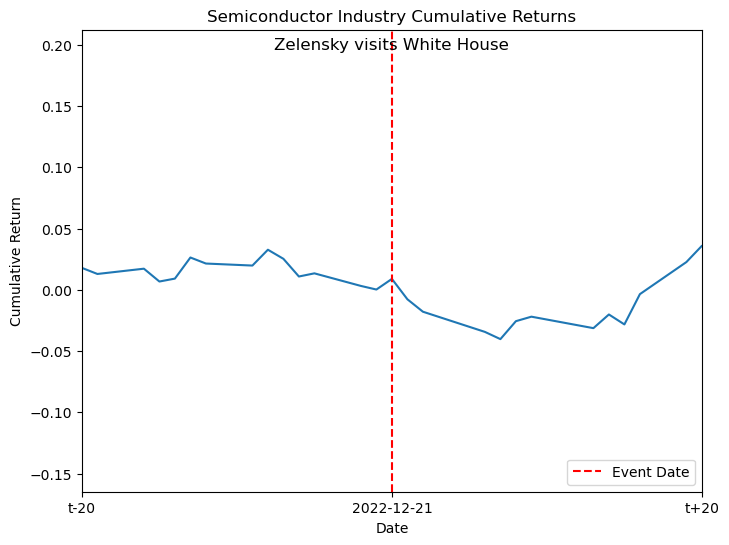

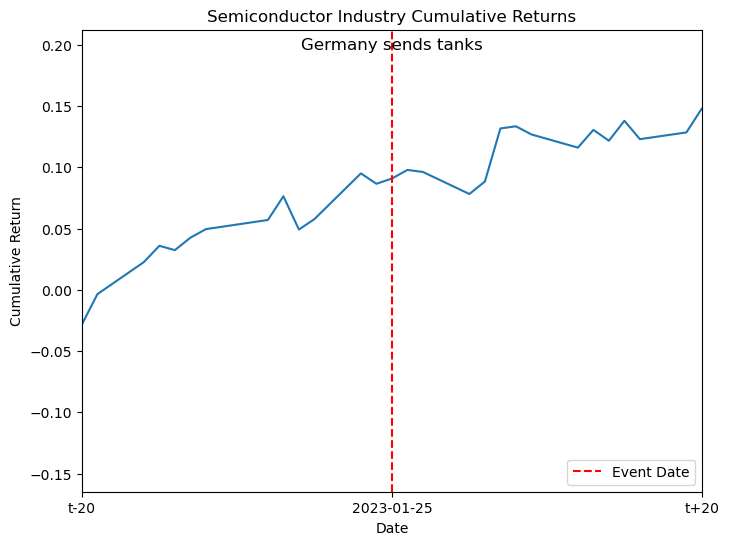

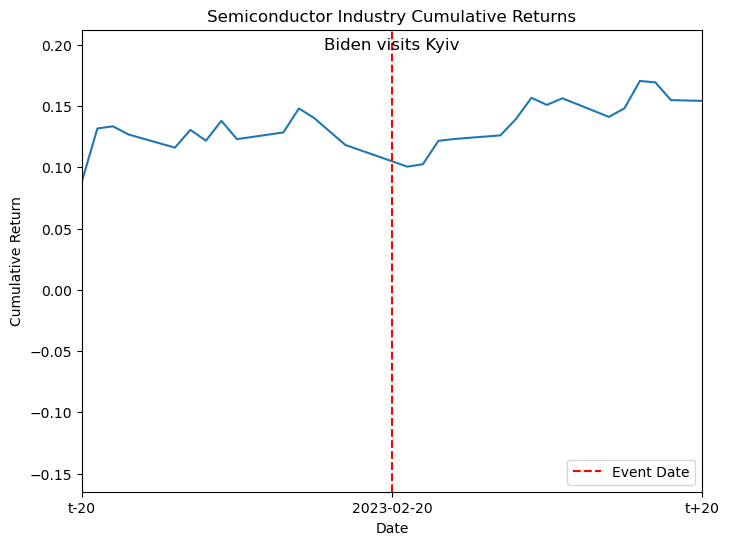

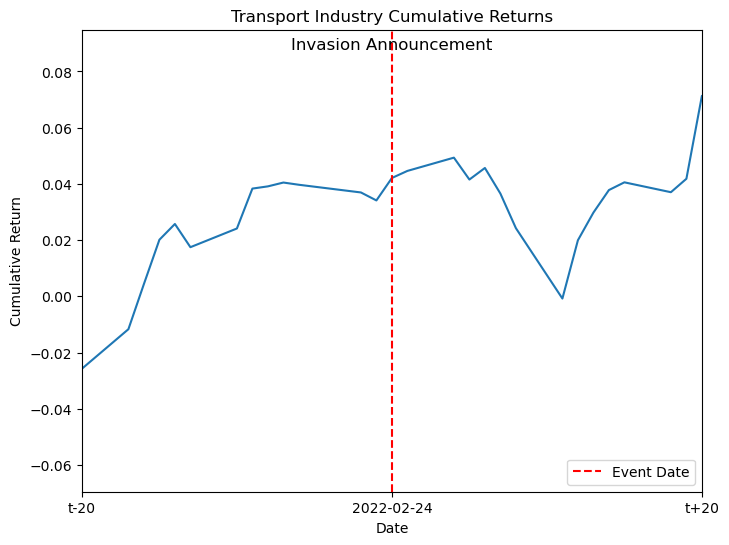

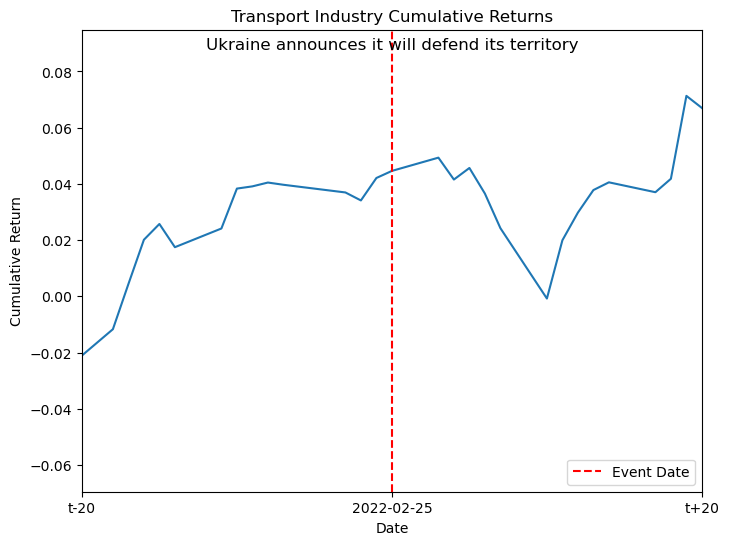

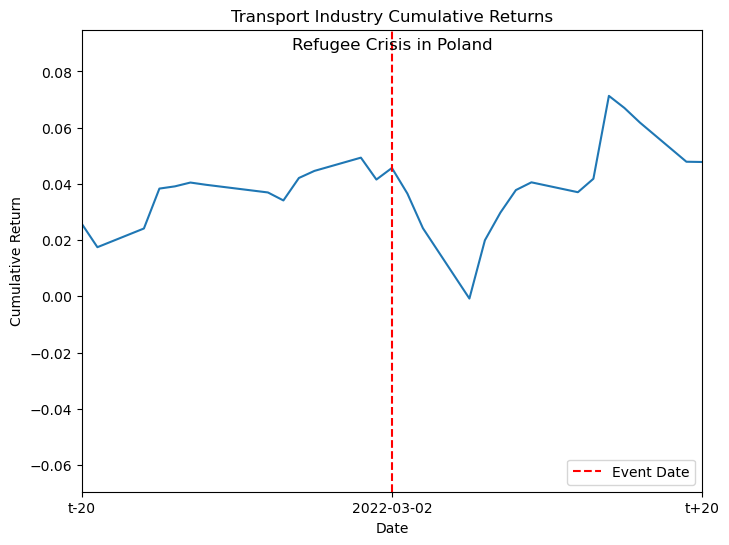

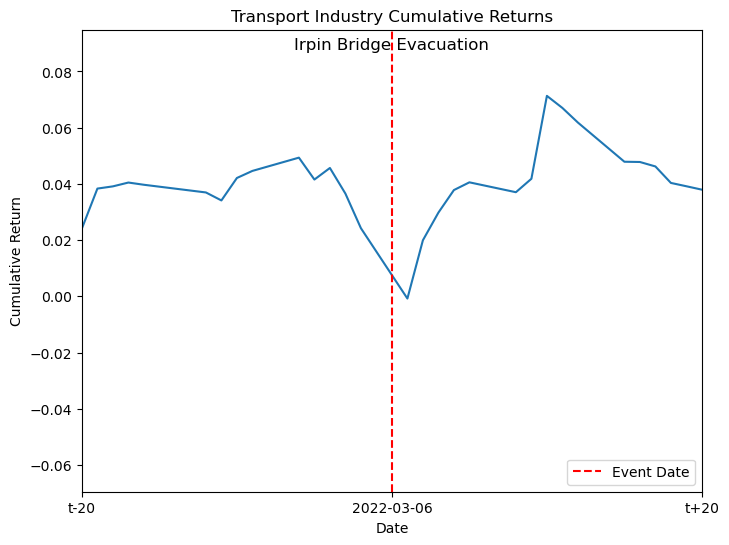

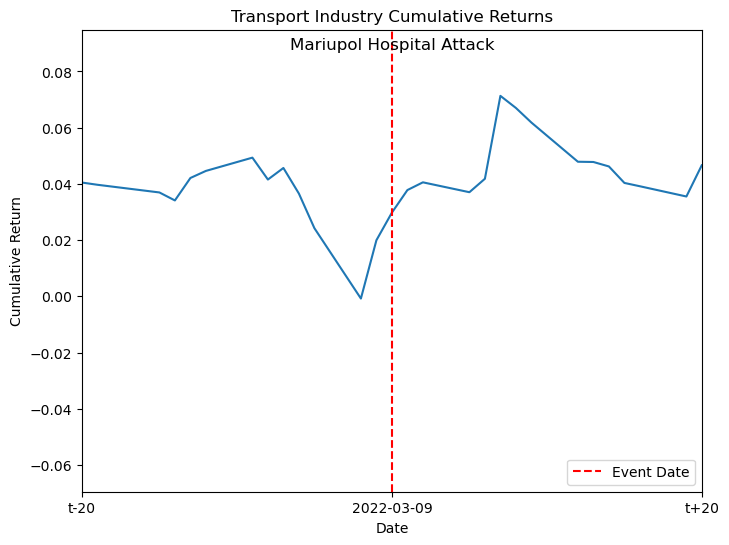

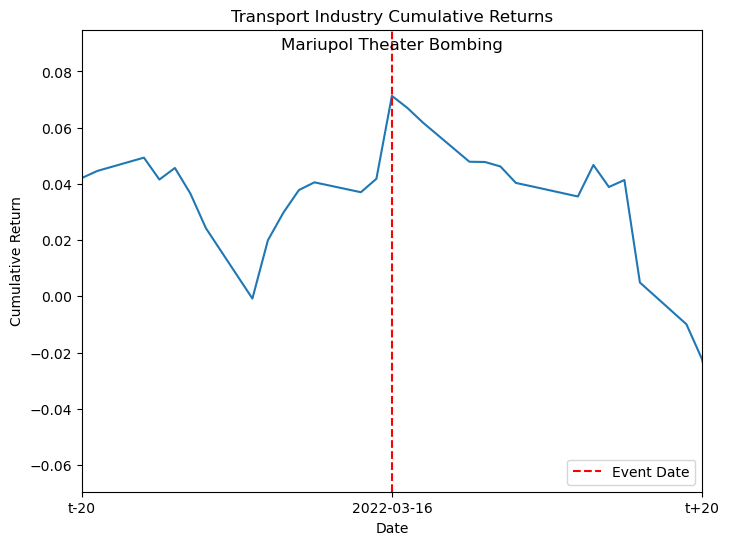

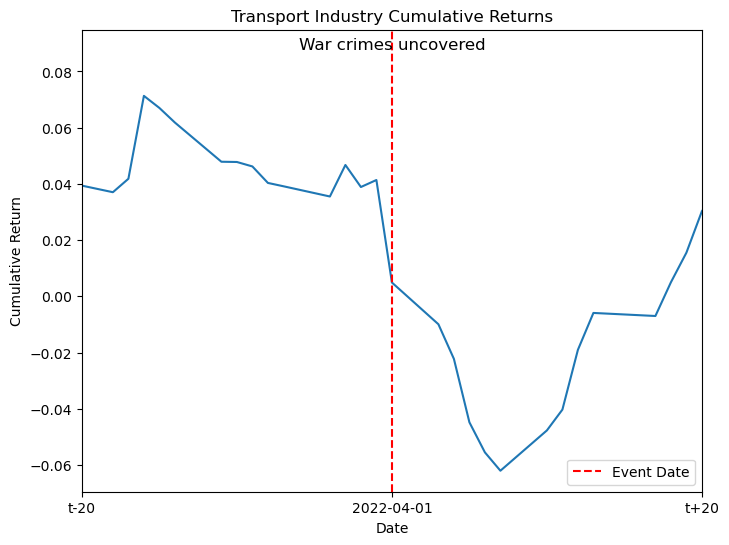

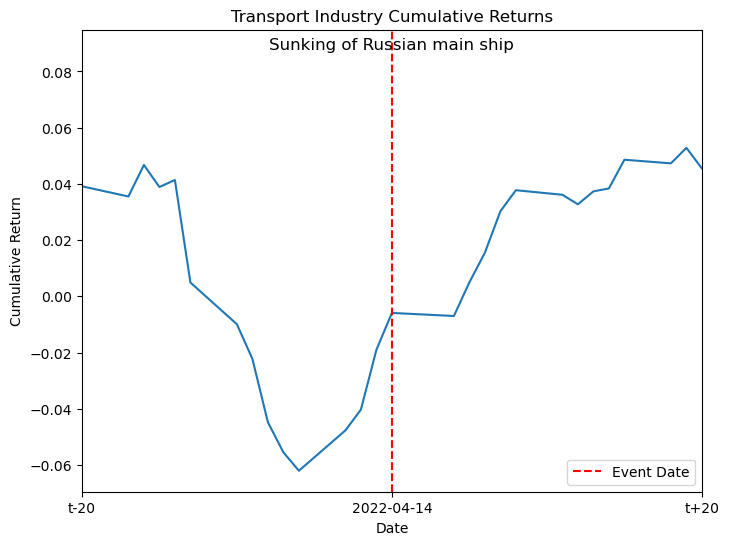

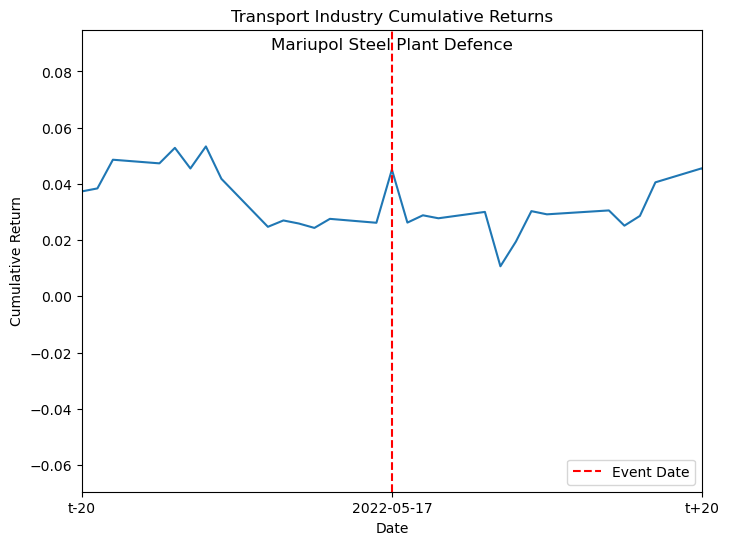

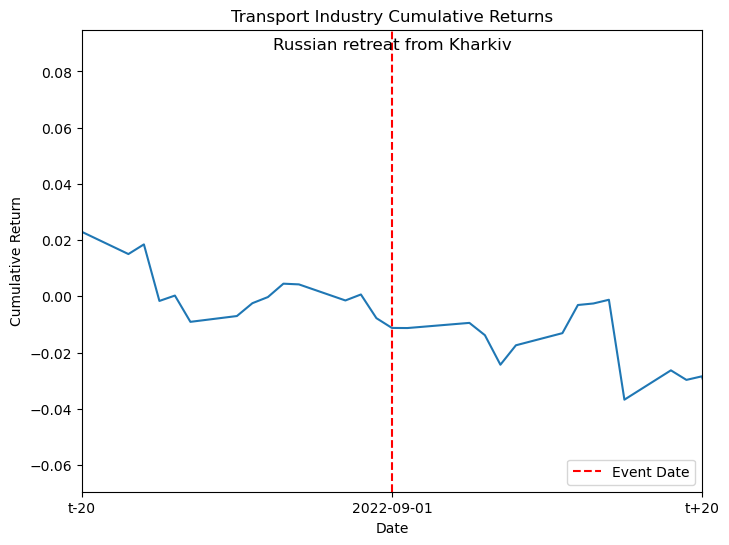

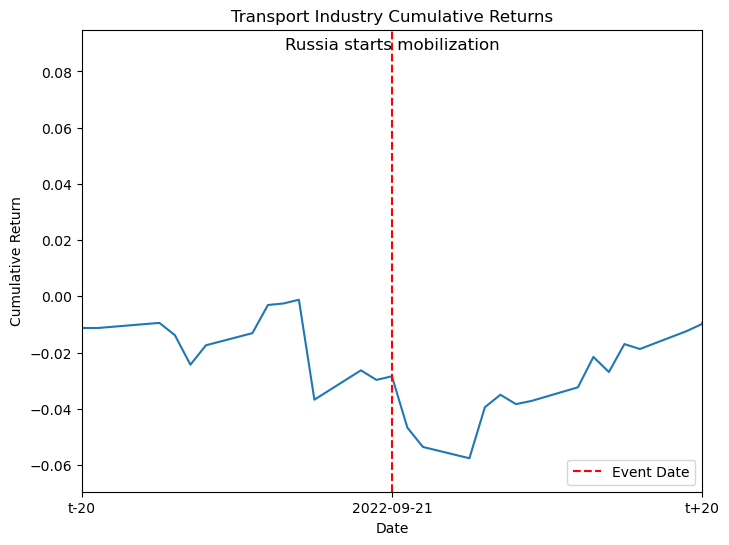

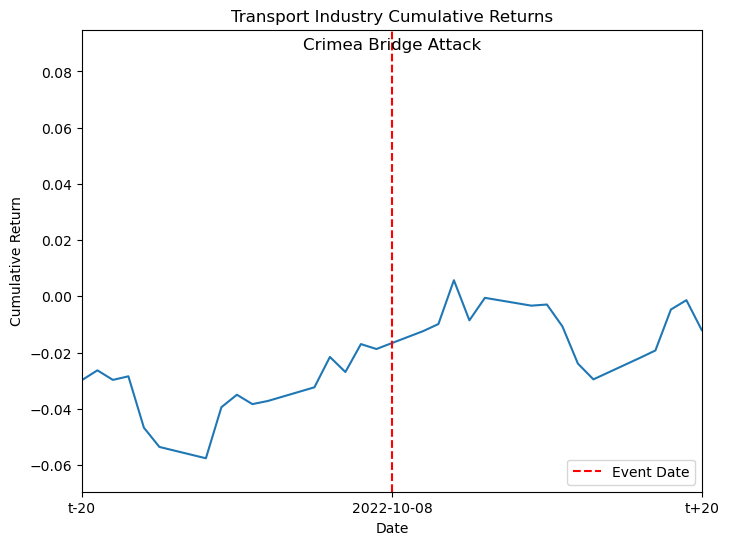

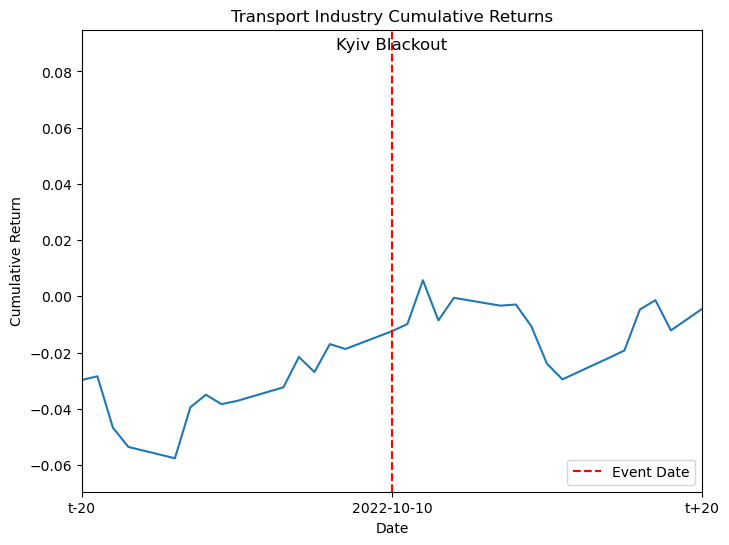

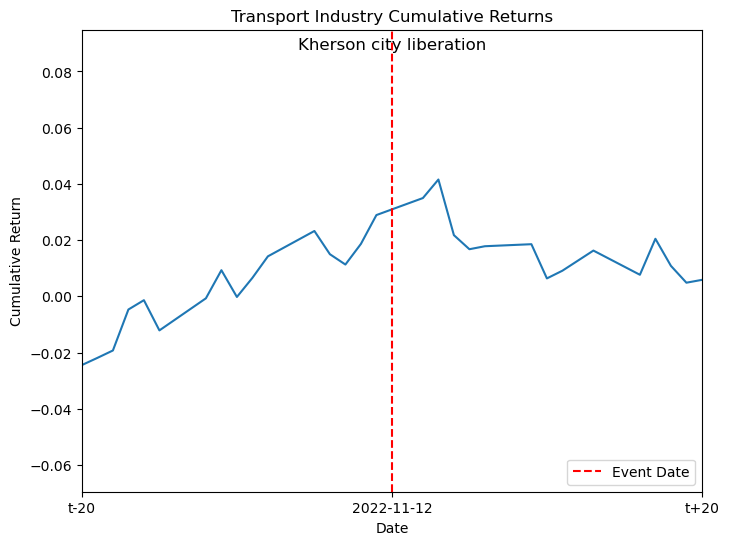

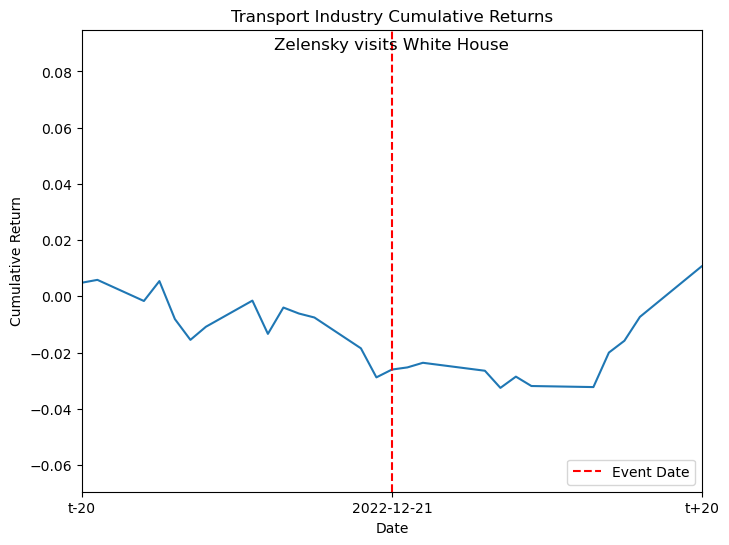

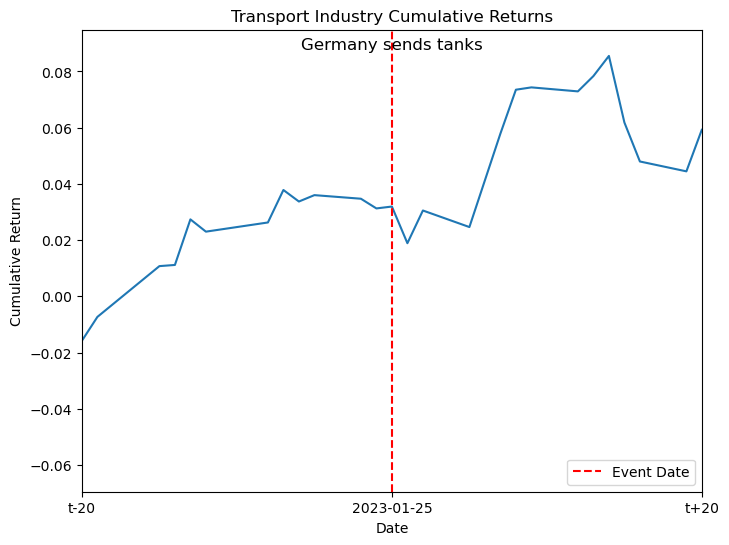

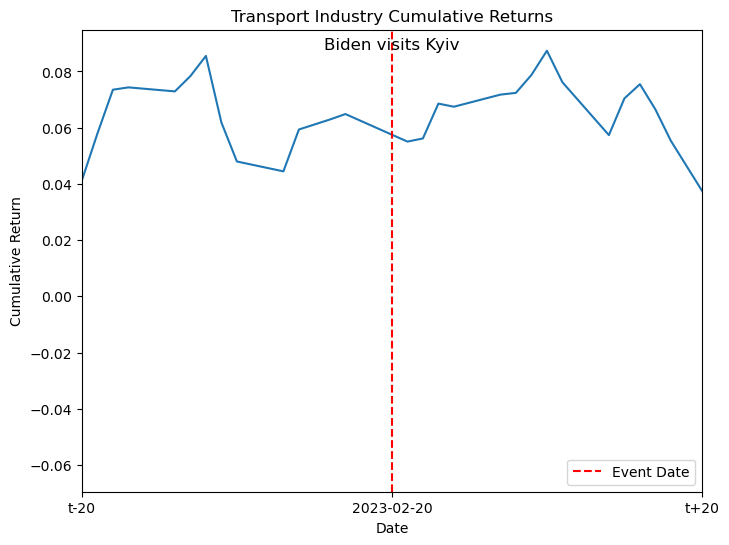

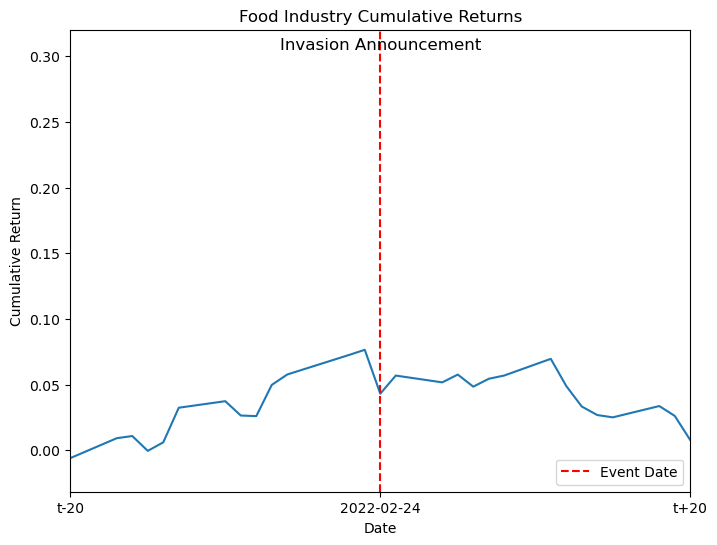

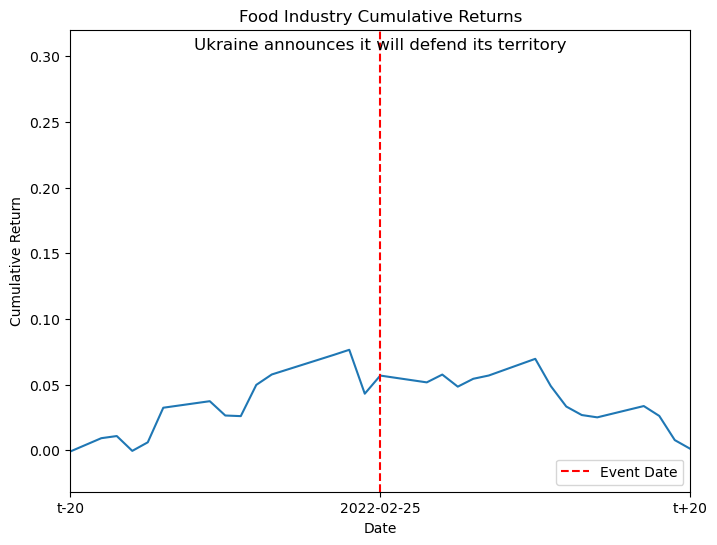

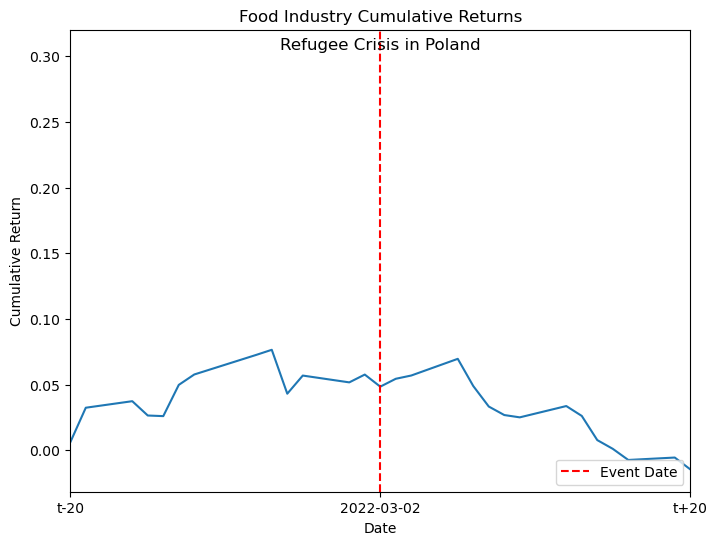

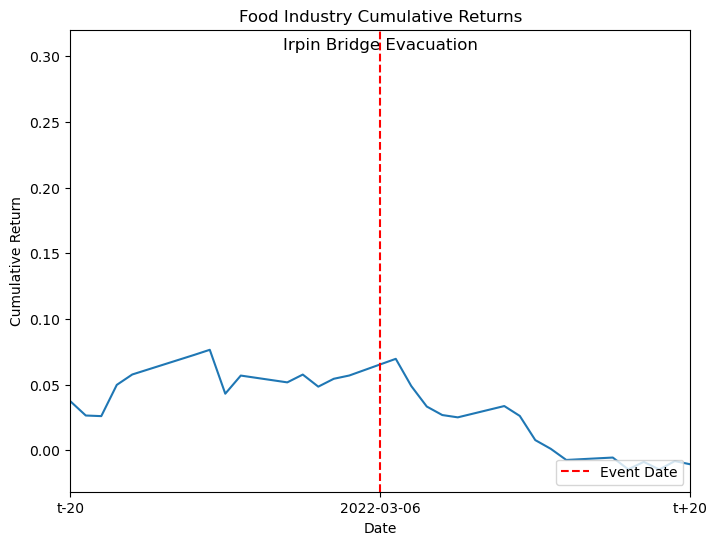

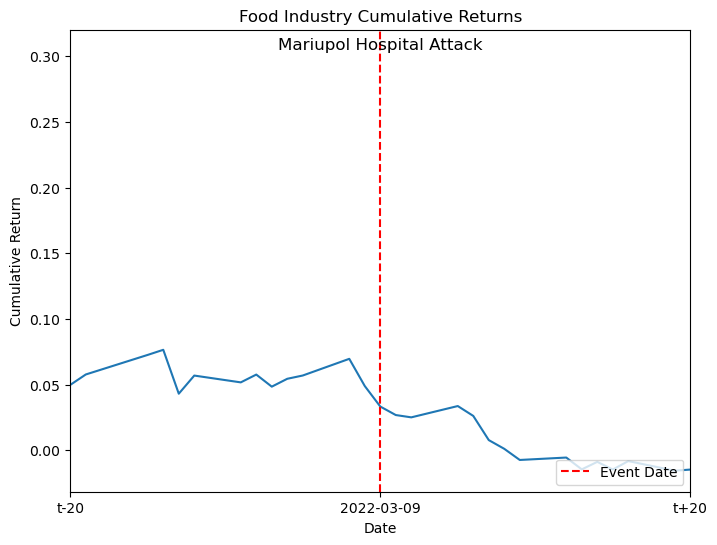

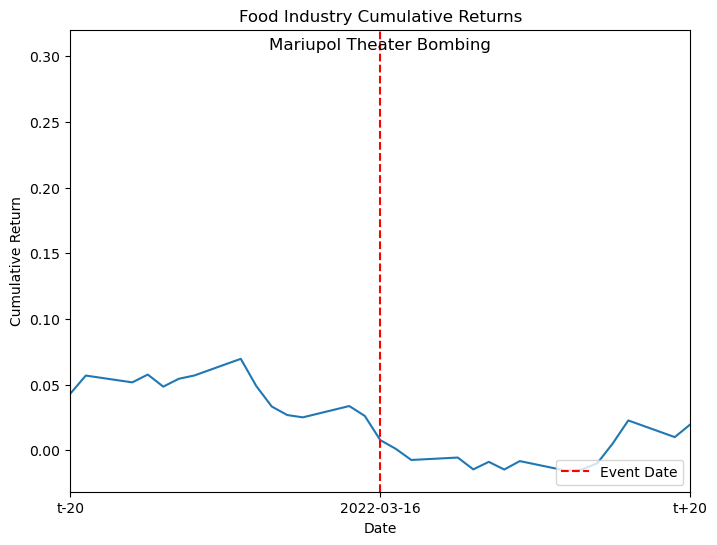

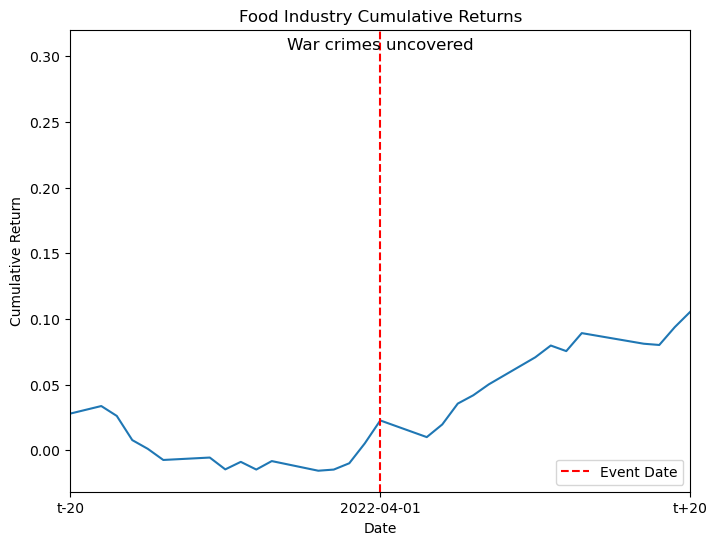

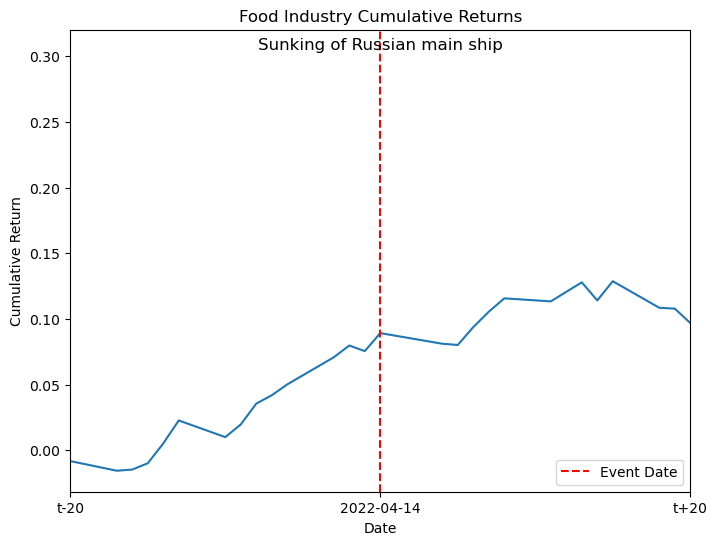

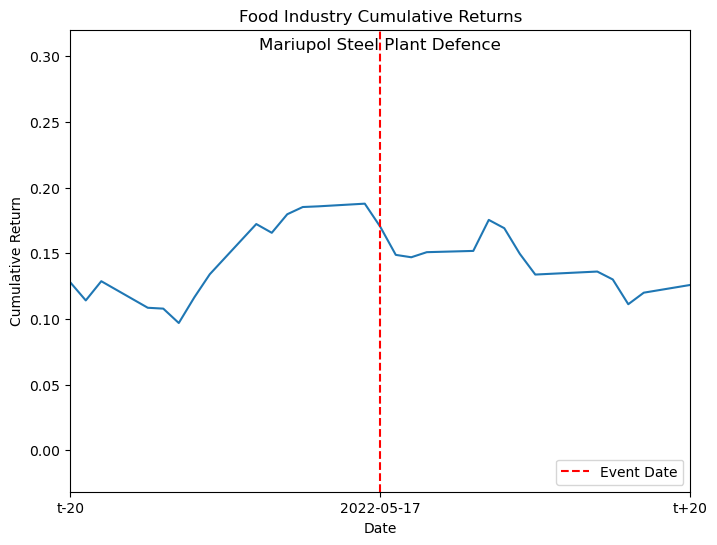

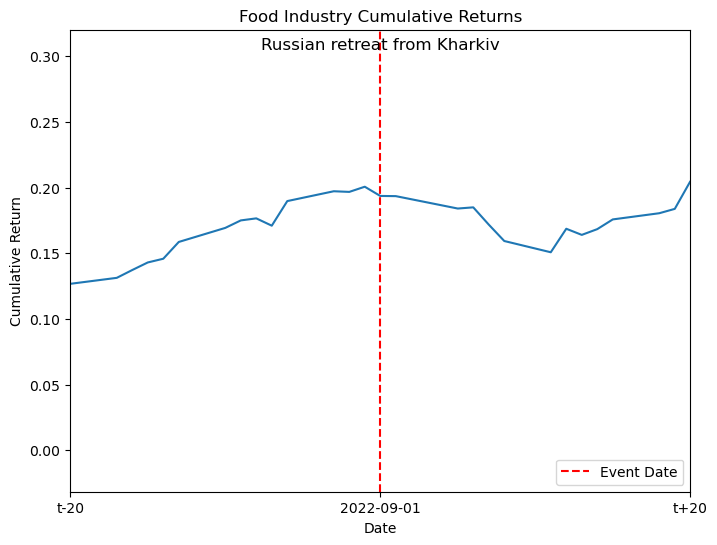

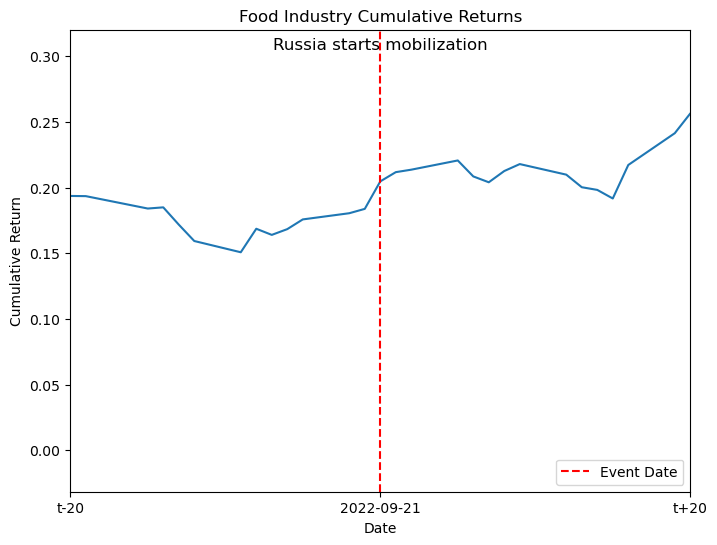

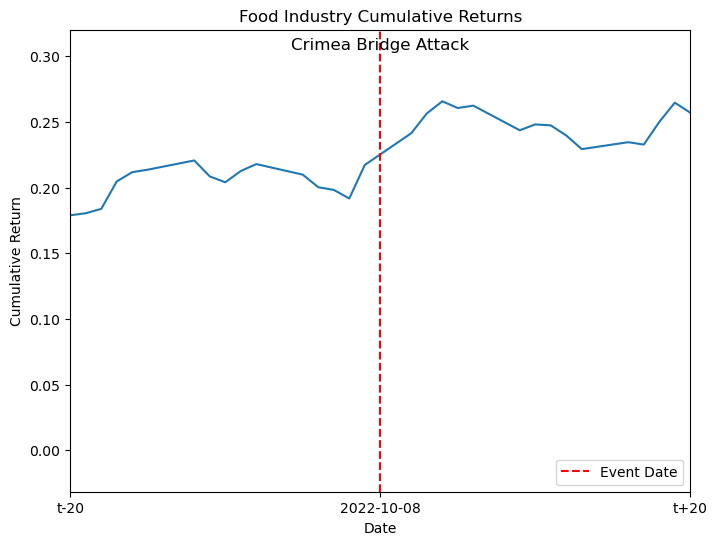

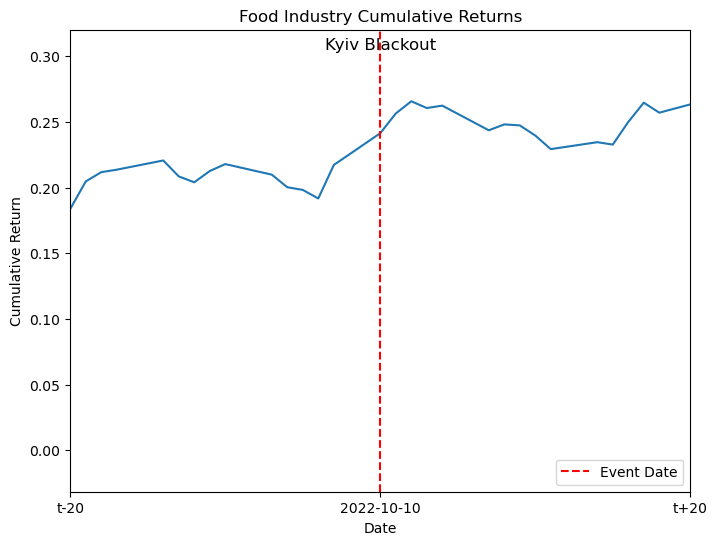

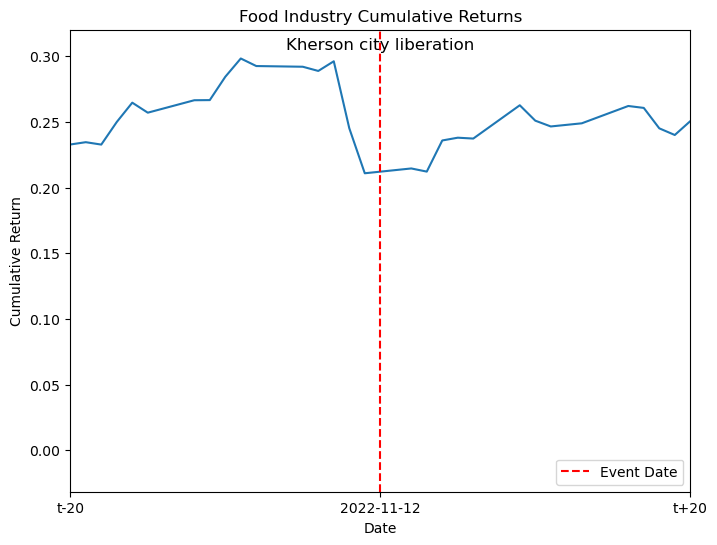

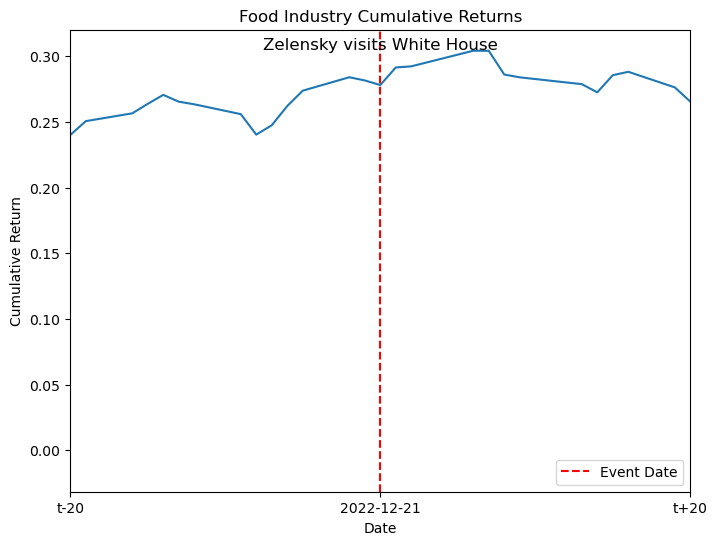

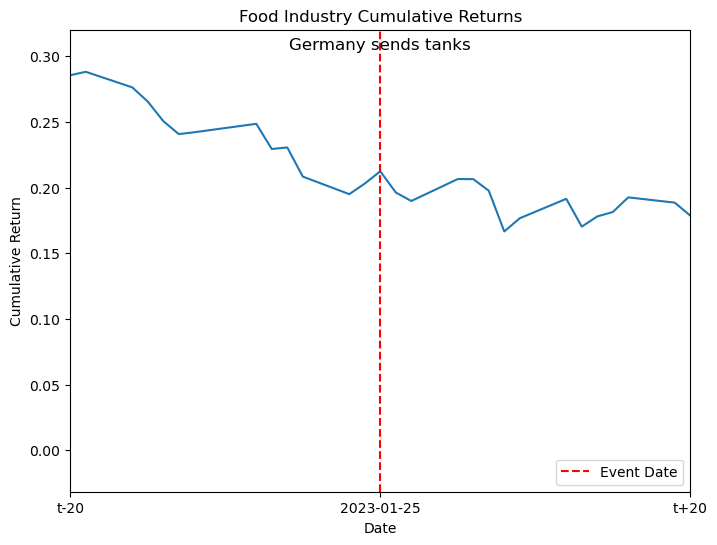

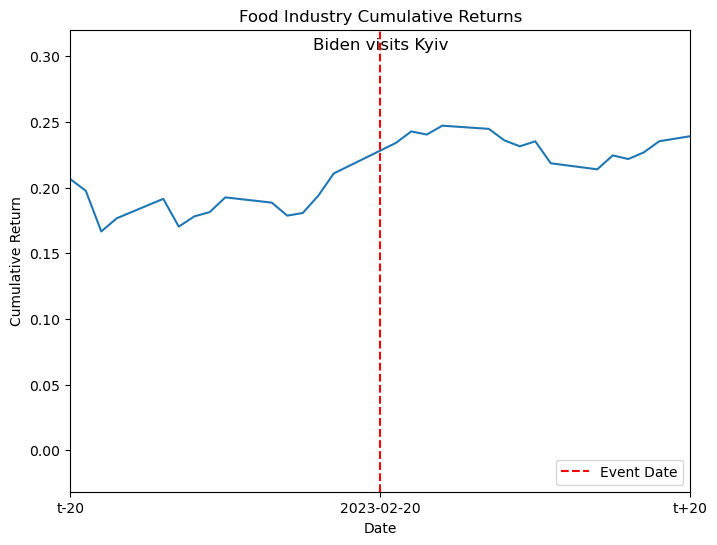

In [31]:
datasets = [metal_cum, energy_cum, semi_cum, trans_cum, food_cum]
string = "garganta"
for df in datasets:
    for index, row in event_dates.iterrows():
        event = row['Event']
        date = row['Date']
        
        if df.equals(metal_cum):
            string = 'Metal Industry'
        elif df.equals(energy_cum):
            string = 'Energy Industry'
        elif df.equals(semi_cum):
            string = 'Semiconductor Industry'
        elif df.equals(trans_cum):
            string = 'Transport Industry'
        elif df.equals(food_cum):
            string = 'Food Industry'

        # set plot size
        plt.figure(figsize=(8, 6))

        # create the line plot
        sns.lineplot(x='Date', y='Cum_ret', data=df)

        # add vertical line for the date
        plt.axvline(date, color='red', linestyle='--', label='Event Date')

        # set x-axis limits
        plt.xlim(date - pd.Timedelta(days=20), date + pd.Timedelta(days=20))

        # set x-axis ticks
        xticks = [date - pd.Timedelta(days=20), date, date + pd.Timedelta(days=20)]
        xticklabels = ['t-20', date.strftime('%Y-%m-%d'), 't+20']
        plt.xticks(xticks, xticklabels)

        # add title and axis labels
        title = string + ' Cumulative Returns'
        plt.title(title)
        plt.xlabel('Date')
        plt.ylabel('Cumulative Return')

        # move the legend to the bottom right corner
        plt.legend(loc='lower right')

        # add text label for the event
        ymin, ymax = plt.ylim()
        y_pos = ymax - (ymax - ymin) * 0.05

        # add text to plot
        plt.text(date, y_pos, event, fontsize=12,
                 ha='center', va='bottom')

        # show the plot
        plt.show()

## All industry plots

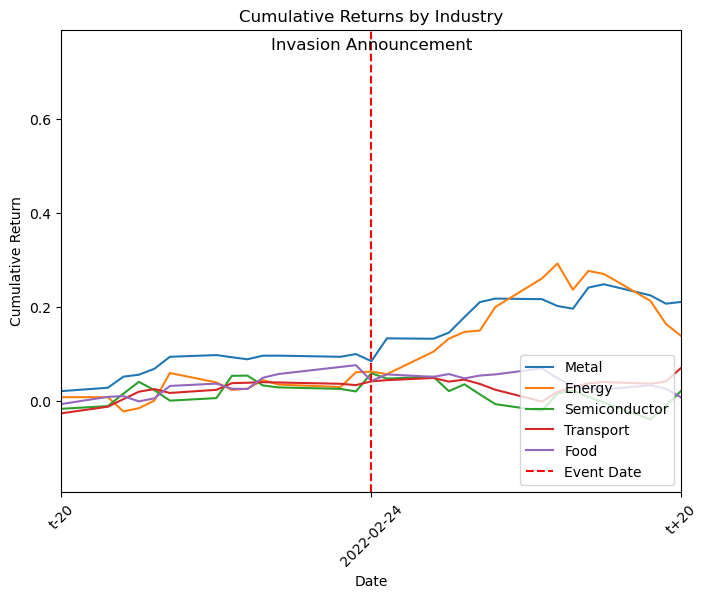

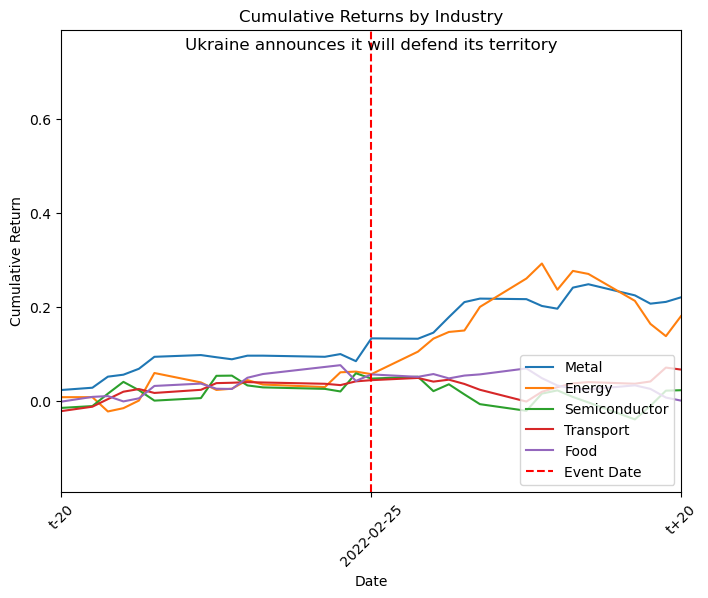

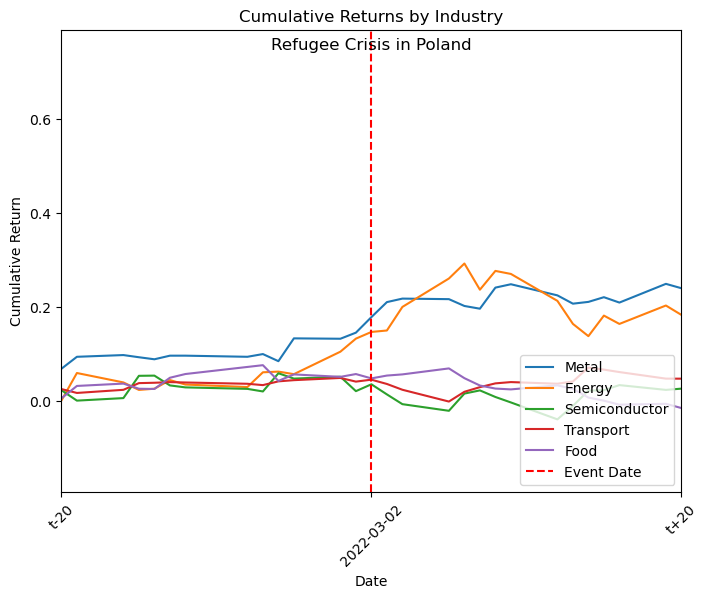

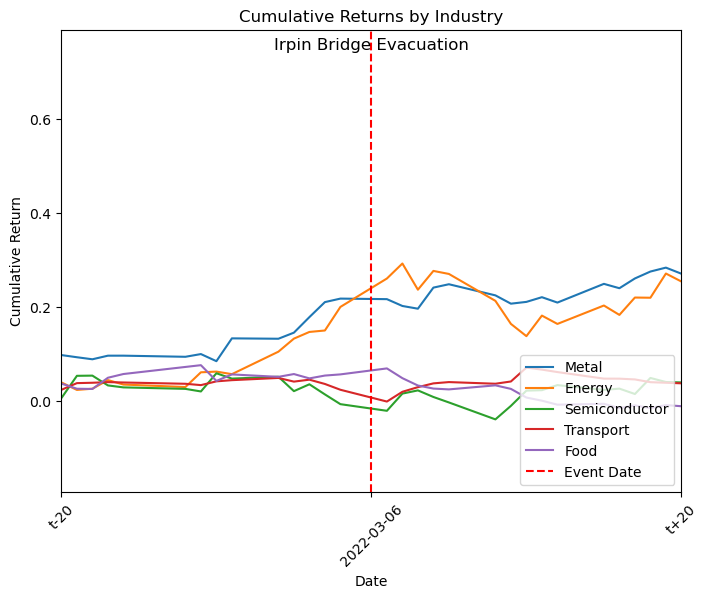

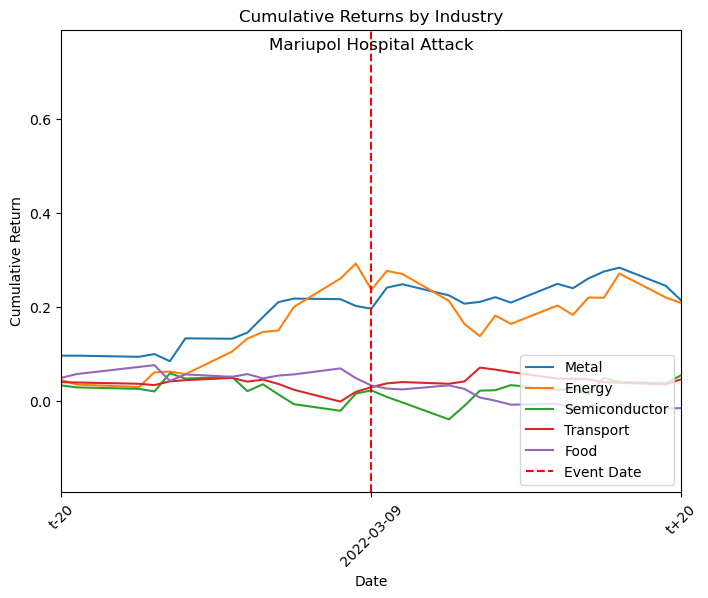

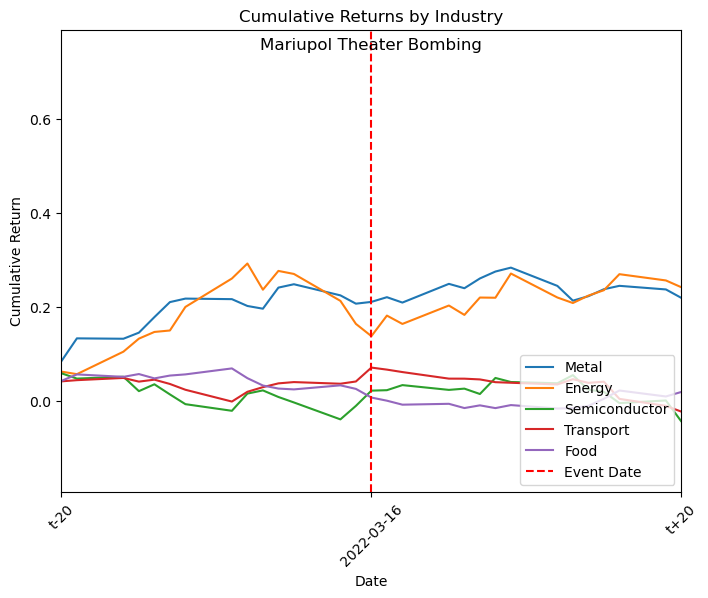

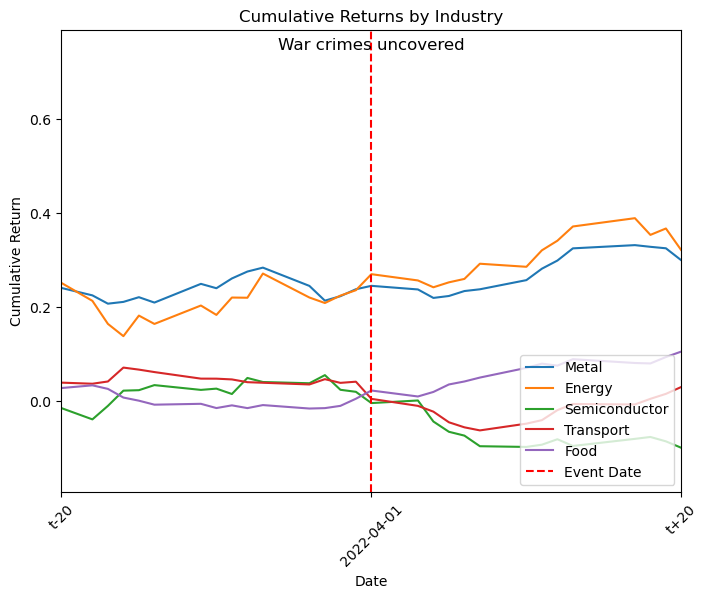

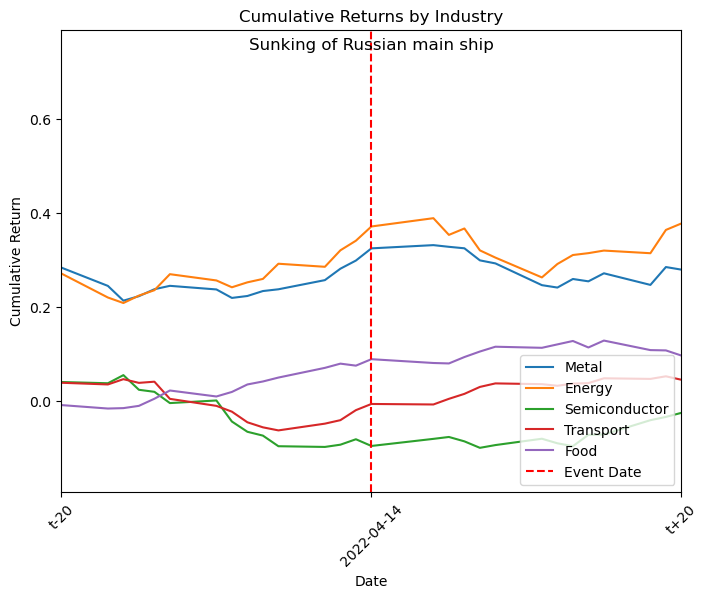

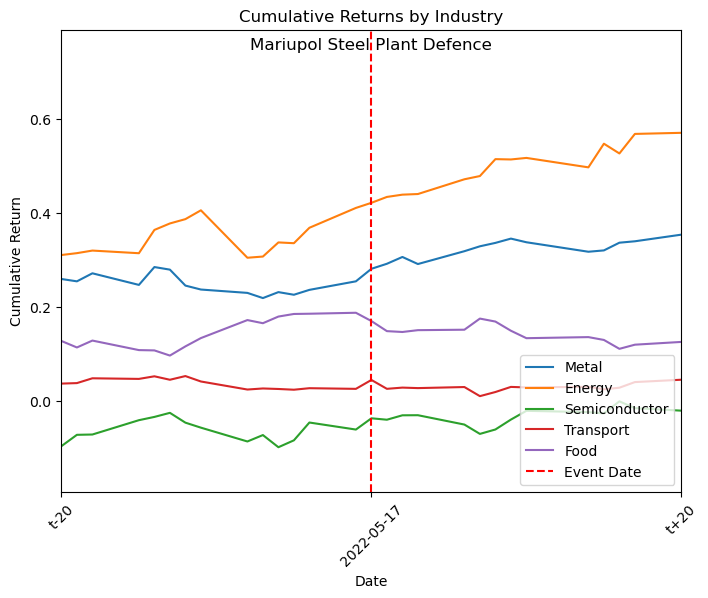

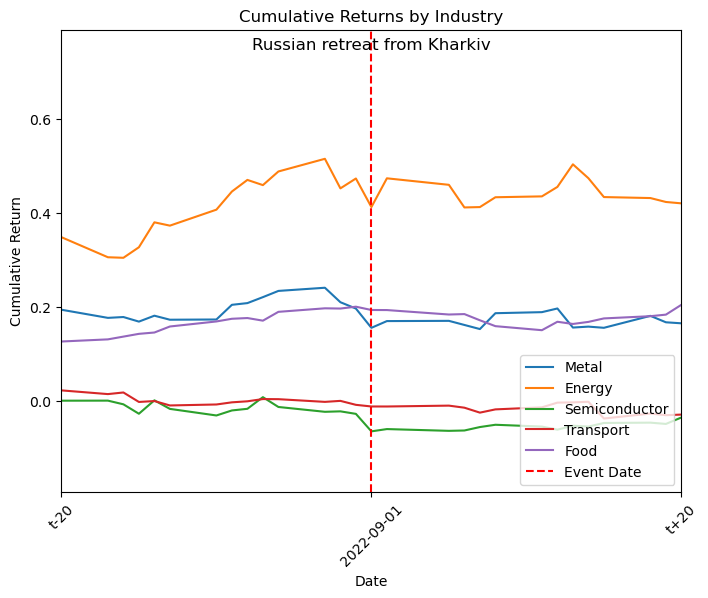

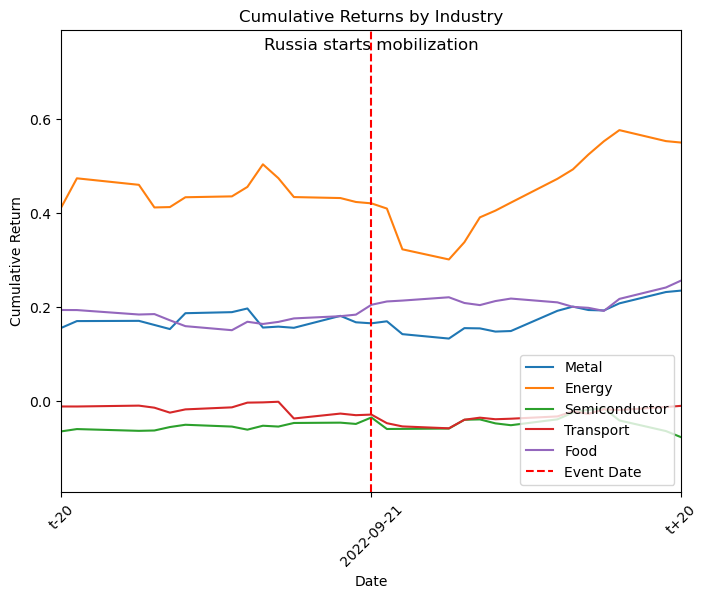

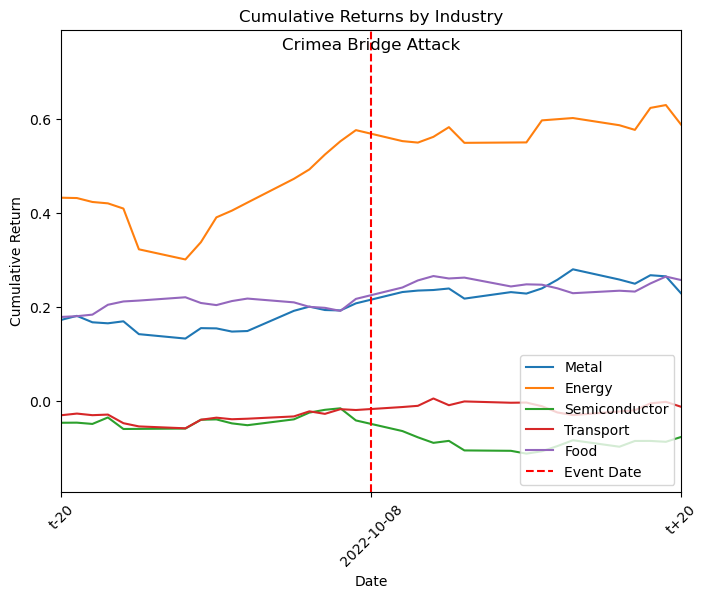

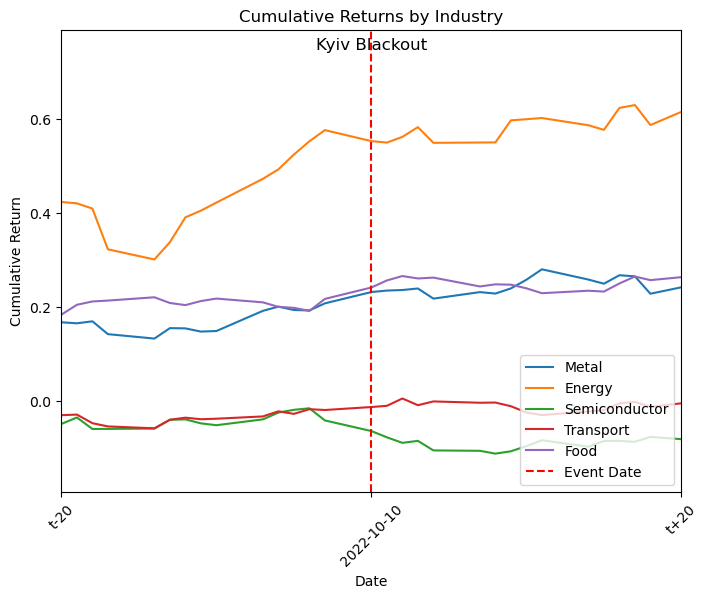

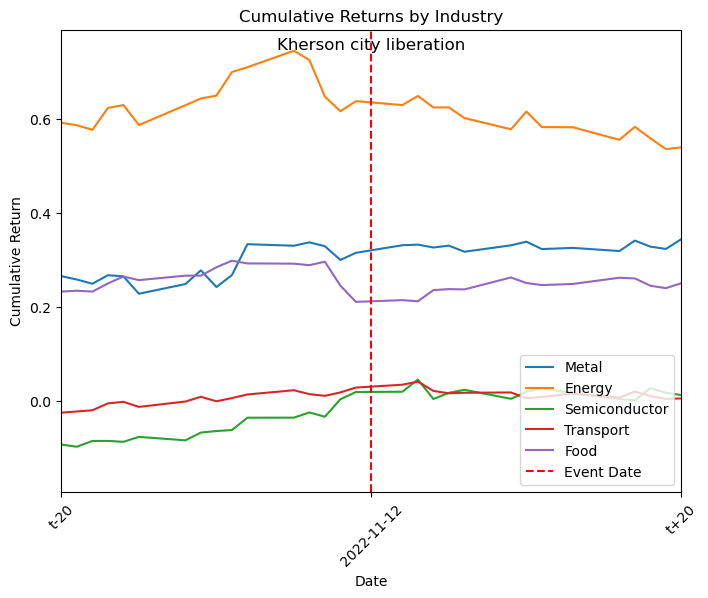

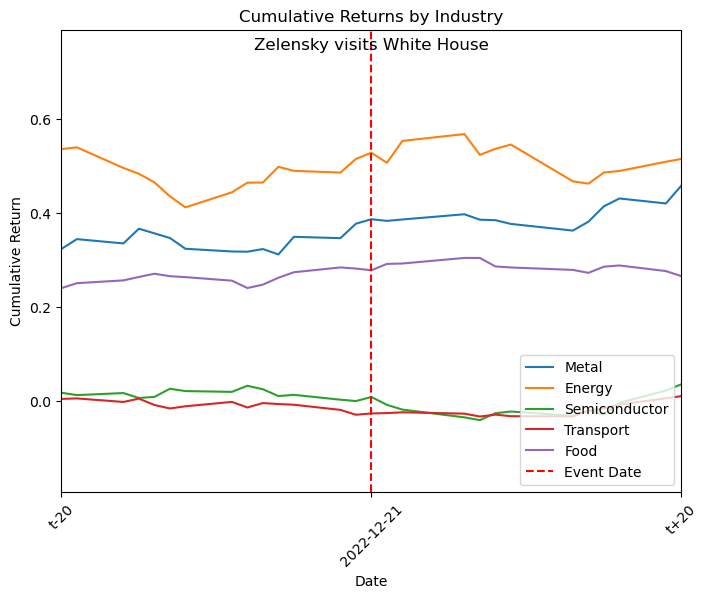

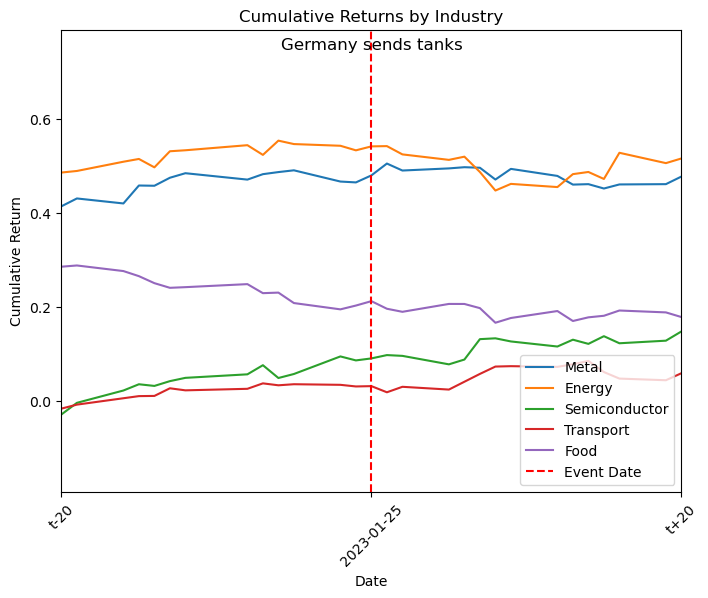

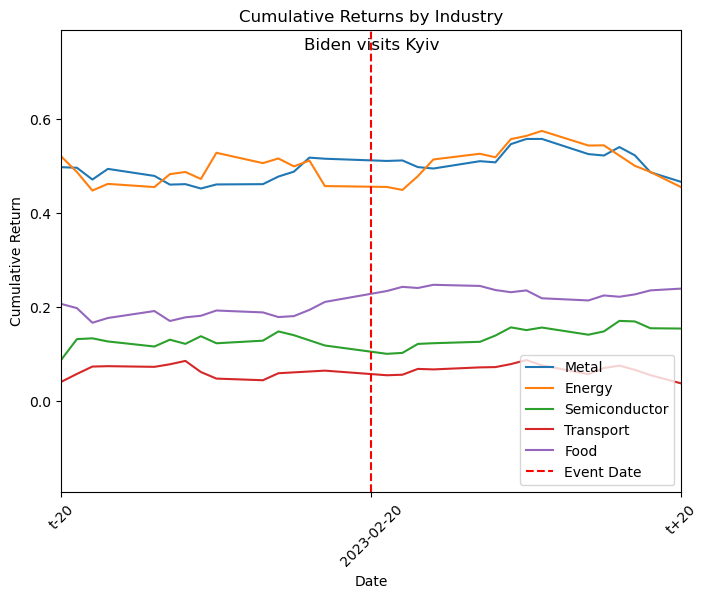

In [32]:
for index, row in event_dates.iterrows():
    event = row['Event']
    date = row['Date']
    plt.figure(figsize=(8, 6))

    # create the line plot for each industry
    sns.lineplot(x='Date', y='Metal', data=merged_df, label='Metal')
    sns.lineplot(x='Date', y='Energy', data=merged_df, label='Energy')
    sns.lineplot(x='Date', y='Semiconductor', data=merged_df, label='Semiconductor')
    sns.lineplot(x='Date', y='Transport', data=merged_df, label='Transport')
    sns.lineplot(x='Date', y='Food', data=merged_df, label='Food')
    
    plt.axvline(date, color='red', linestyle='--', label='Event Date')
    plt.xlim(date - pd.Timedelta(days=20), date + pd.Timedelta(days=20))
    
    # set x-axis ticks
    xticks = [date - pd.Timedelta(days=20), date, date + pd.Timedelta(days=20)]
    xticklabels = ['t-20', date.strftime('%Y-%m-%d'), 't+20']
    plt.xticks(xticks, xticklabels)
    plt.xticks(rotation=45)
    
    # add title and axis labels
    plt.title('Cumulative Returns by Industry')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Return')
        
    ymin, ymax = plt.ylim()
    y_pos = ymax - (ymax - ymin) * 0.05

    # add text to plot
    plt.text(date, y_pos, event, fontsize=12,
             ha='center', va='bottom')

    # move the legend to the bottom right corner
    plt.legend(loc='lower right')

    # show the plot
    plt.show()

## Calculating Return differences from event dates (t) to selected days after the event

### Getting Industry Returns at time t

Date       Industry      ret0
0 2022-02-24          Metal  0.084921
1 2022-02-24         Energy  0.062801
2 2022-02-24  Semiconductor  0.059277
3 2022-02-24      Transport  0.042098
4 2022-02-24           Food  0.043025

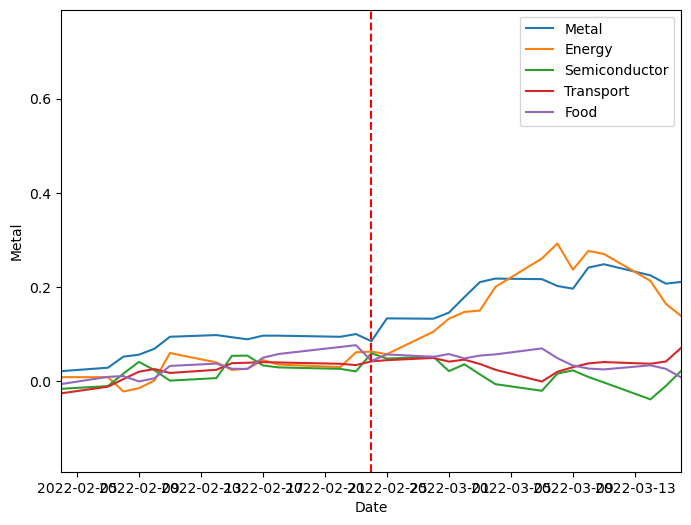

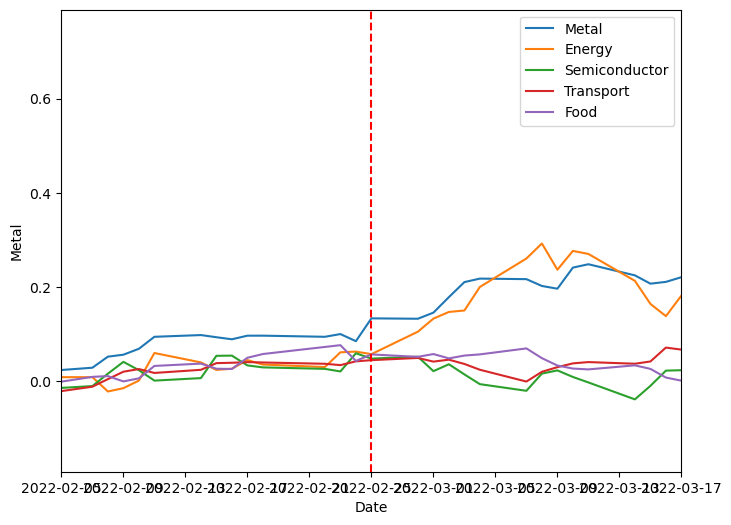

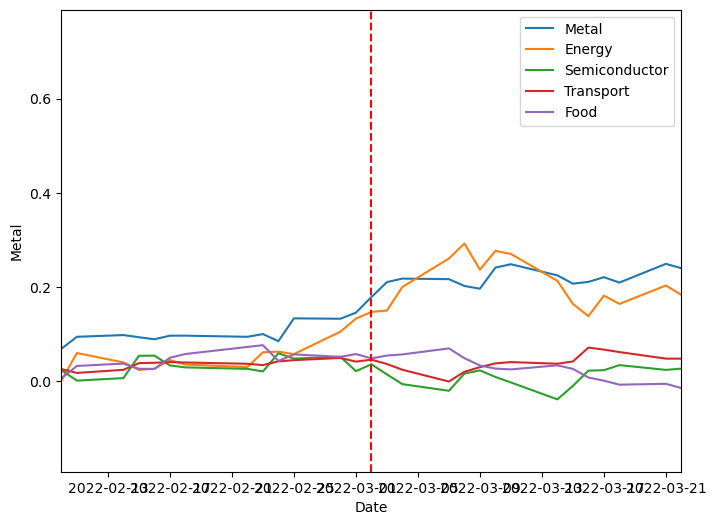

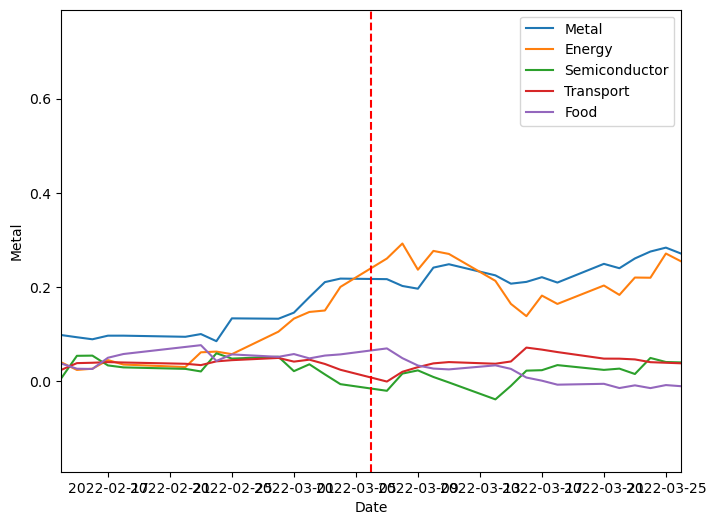

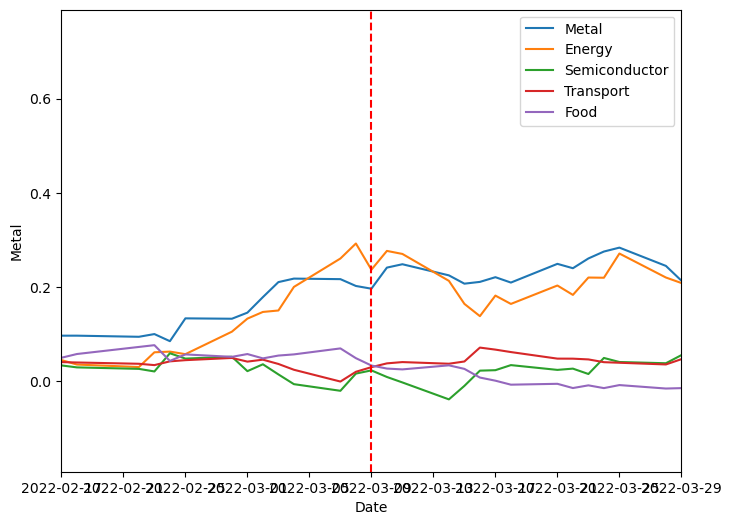

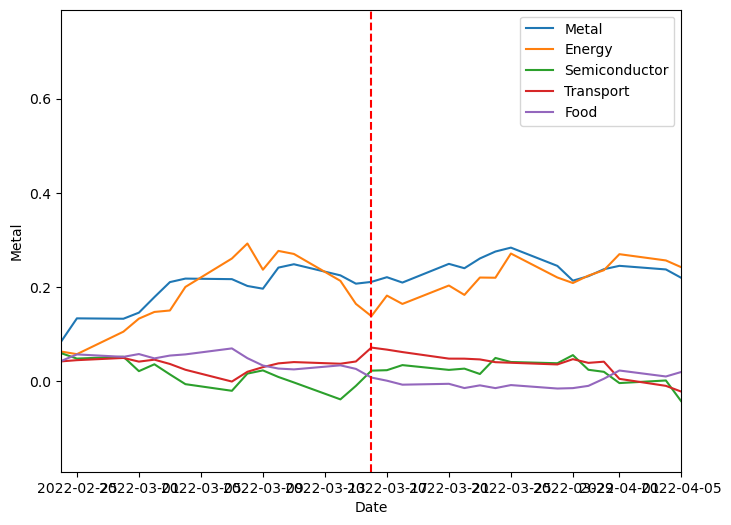

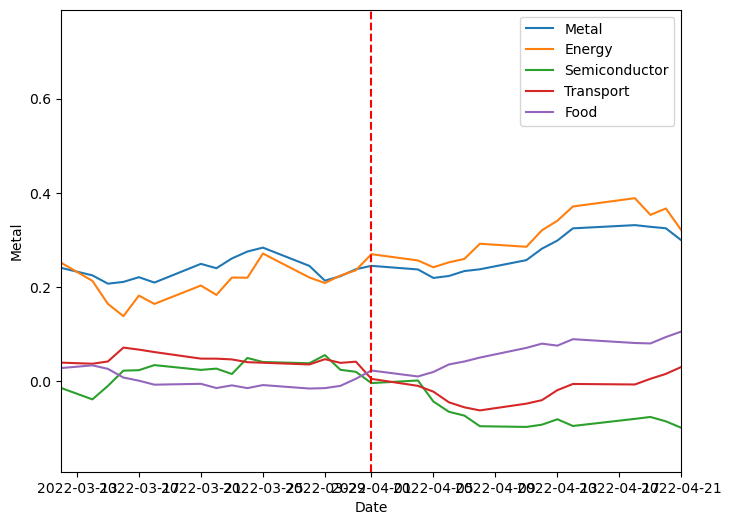

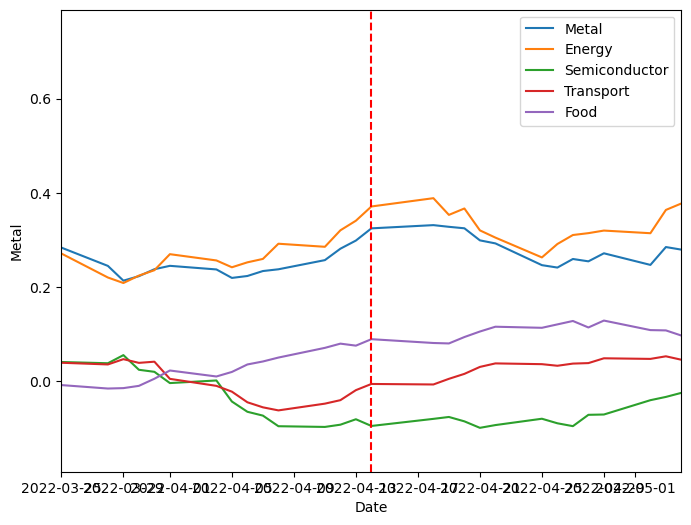

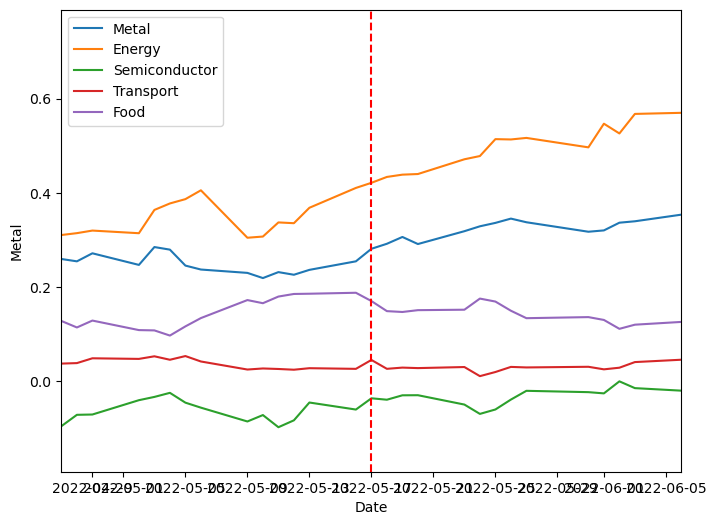

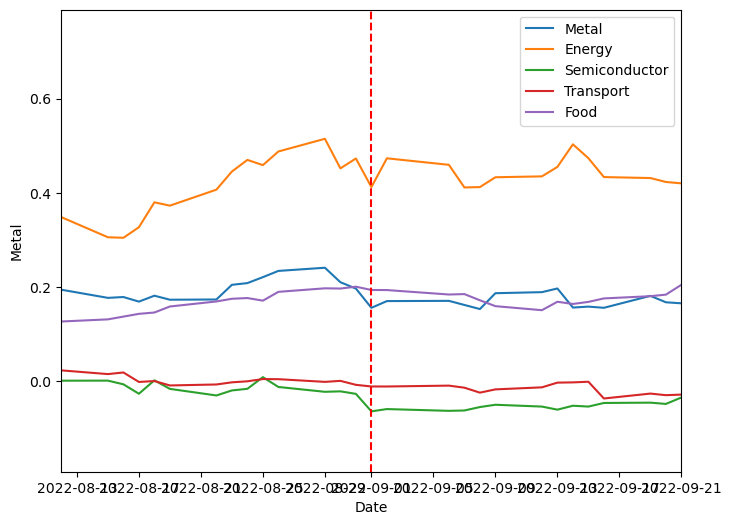

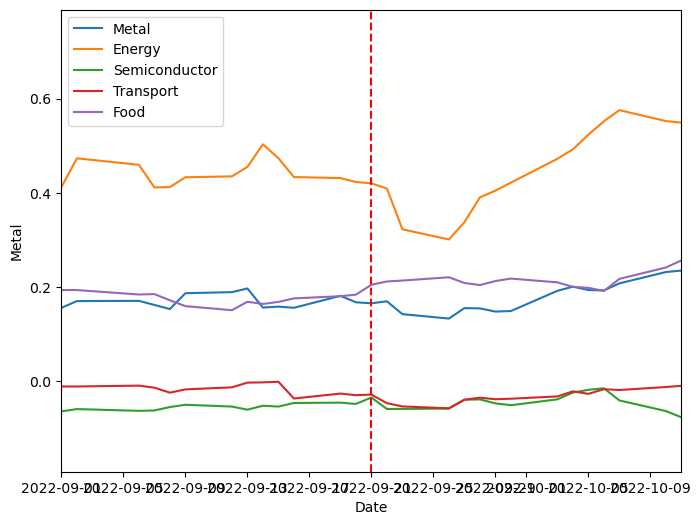

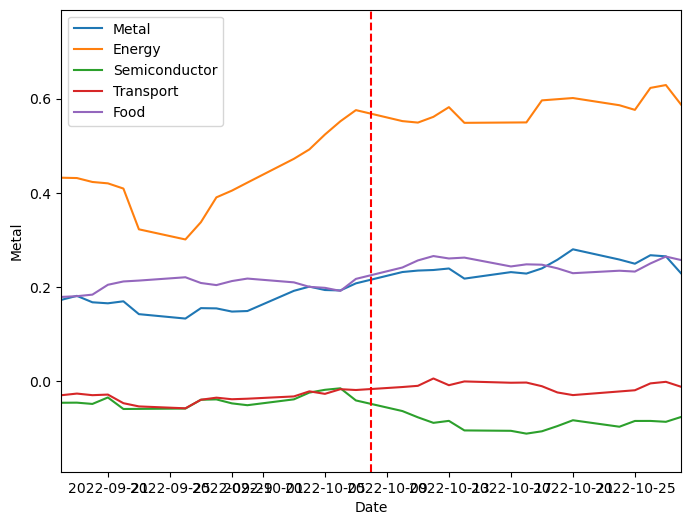

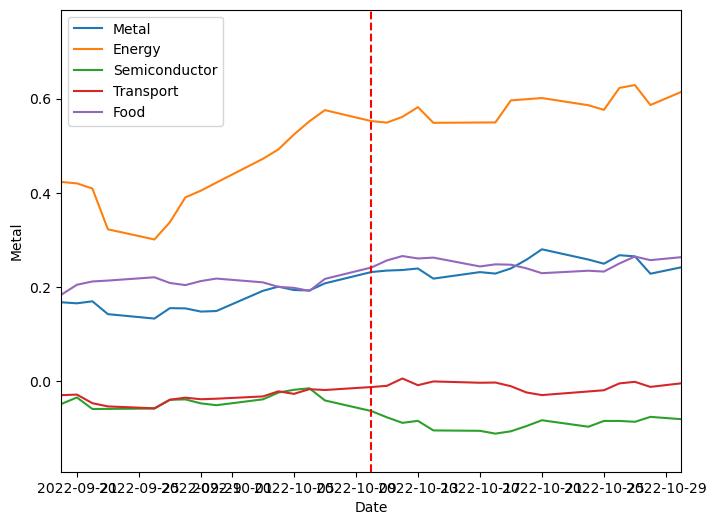

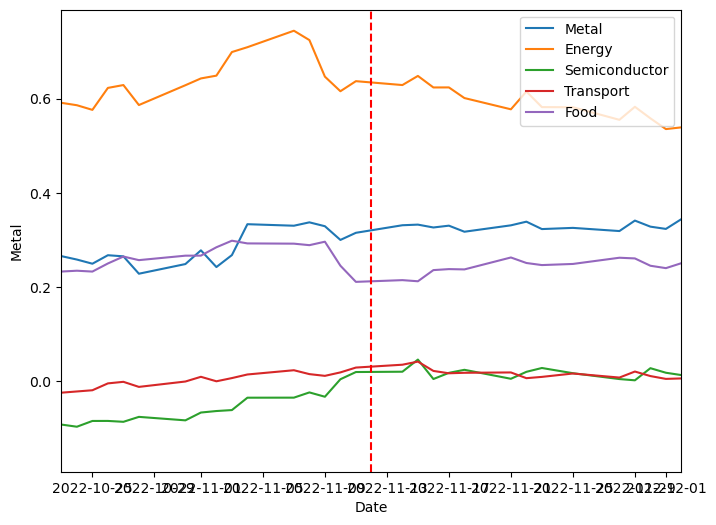

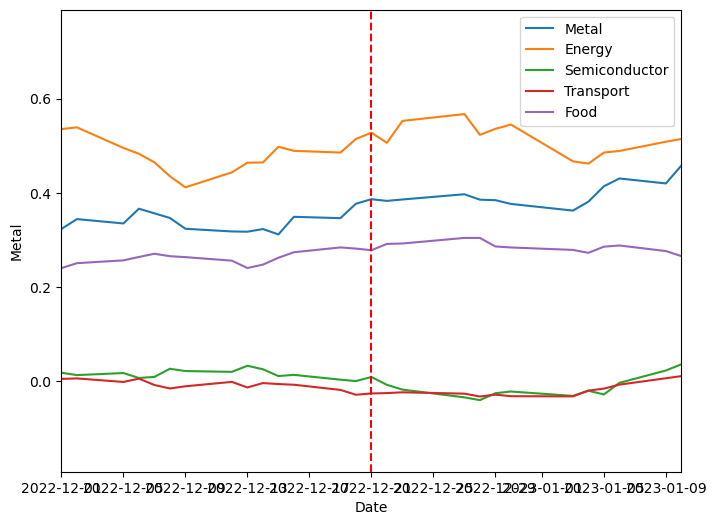

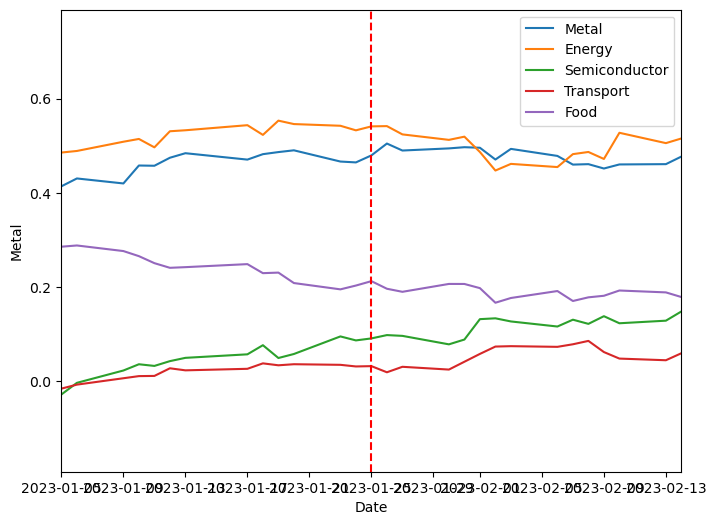

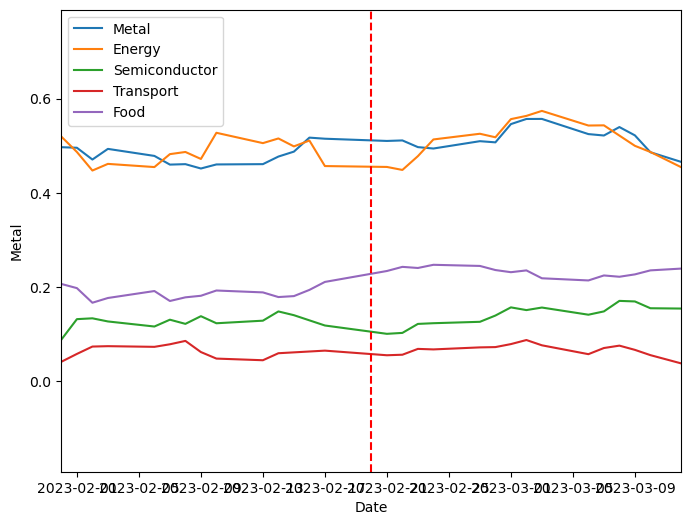

In [33]:
import numpy as np
import matplotlib.dates as mpl_dates
results1 = []
for index, row in event_dates.iterrows():
    event = row['Event']
    date = row['Date']
    plt.figure(figsize=(8, 6))

    # create the line plot for each industry
    sns.lineplot(x='Date', y='Metal', data=merged_df, label='Metal')
    sns.lineplot(x='Date', y='Energy', data=merged_df, label='Energy')
    sns.lineplot(x='Date', y='Semiconductor', data=merged_df, label='Semiconductor')
    sns.lineplot(x='Date', y='Transport', data=merged_df, label='Transport')
    sns.lineplot(x='Date', y='Food', data=merged_df, label='Food')
    
    # add vertical line for event date
    plt.axvline(date, color='red', linestyle='--', label='Event Date')
    plt.xlim(date - pd.Timedelta(days=20), date + pd.Timedelta(days=20))

    for line in plt.gca().lines:
        if line.get_label() != 'Event Date':
            x = mpl_dates.date2num(date)
            y = np.interp(x, line.get_xdata().astype(np.float64), line.get_ydata().astype(np.float64)) # y-value of line plot at x-coordinate
            result = {"Date": date, "Industry": line.get_label(), 'ret0': y}
            results1.append(result)


results_df1 = pd.DataFrame(results1)
results_df1.head(5)

### Getting Industry Returns at time t+3, t+10, and t+20

Date       Industry      ret3     ret10     ret20
0 2022-02-24          Metal  0.132834       NaN       NaN
1 2022-02-24          Metal       NaN  0.217010       NaN
2 2022-02-24          Metal       NaN       NaN  0.210806
3 2022-02-24         Energy  0.089197       NaN       NaN
4 2022-02-24         Energy       NaN  0.240330       NaN
5 2022-02-24         Energy       NaN       NaN  0.138066
6 2022-02-24  Semiconductor  0.050580       NaN       NaN
7 2022-02-24  Semiconductor       NaN -0.015723       NaN
8 2022-02-24  Semiconductor       NaN       NaN  0.022365
9 2022-02-24      Transport  0.047759       NaN       NaN

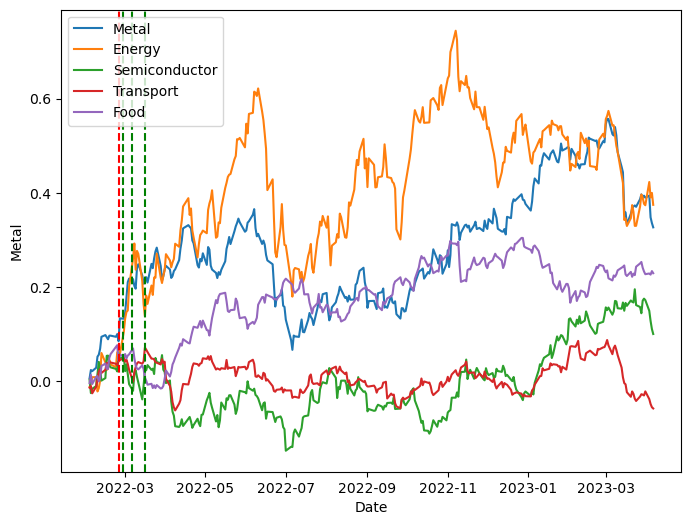

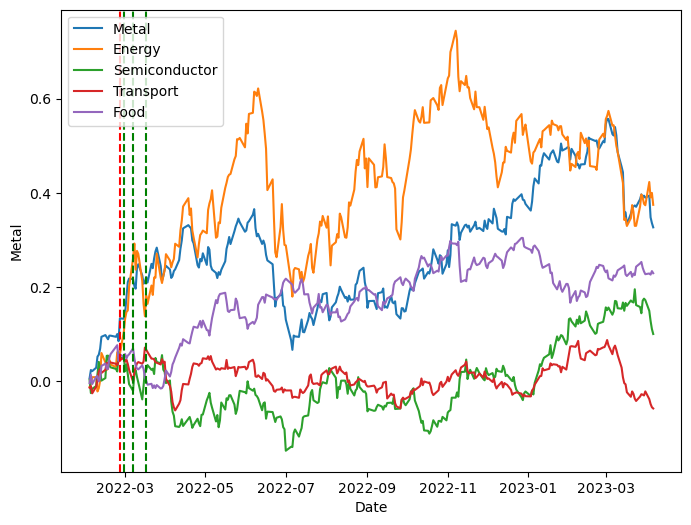

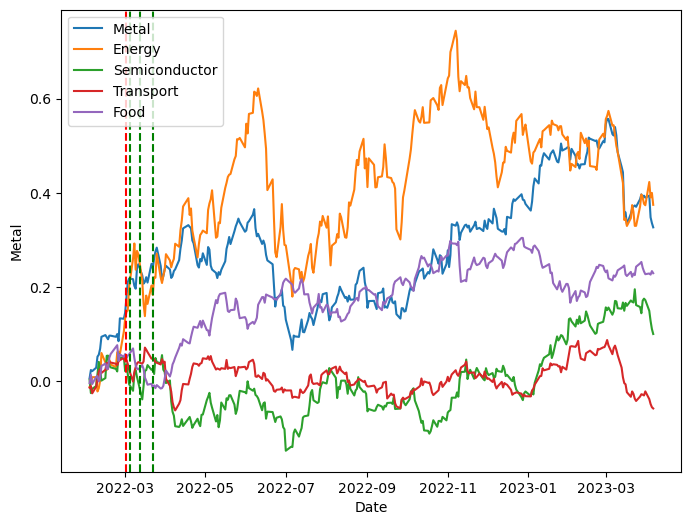

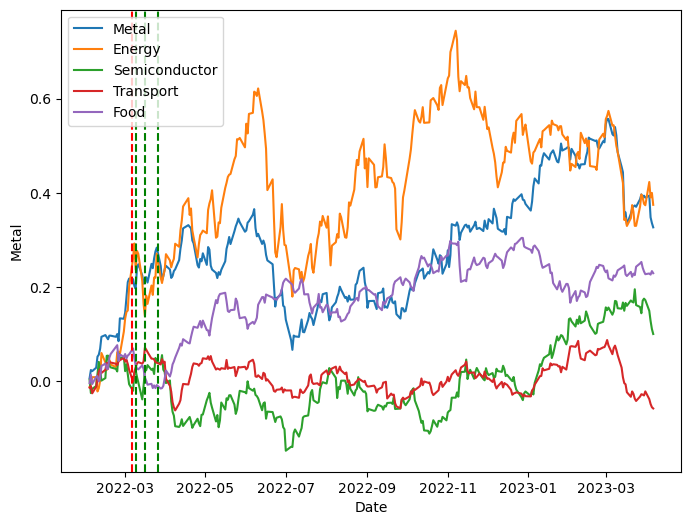

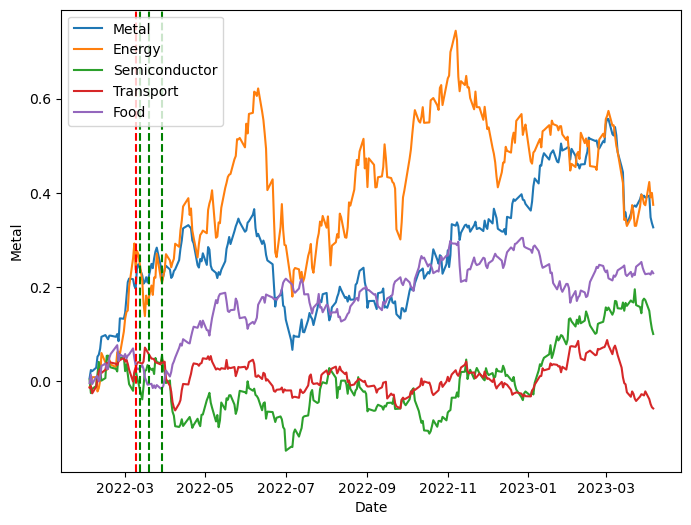

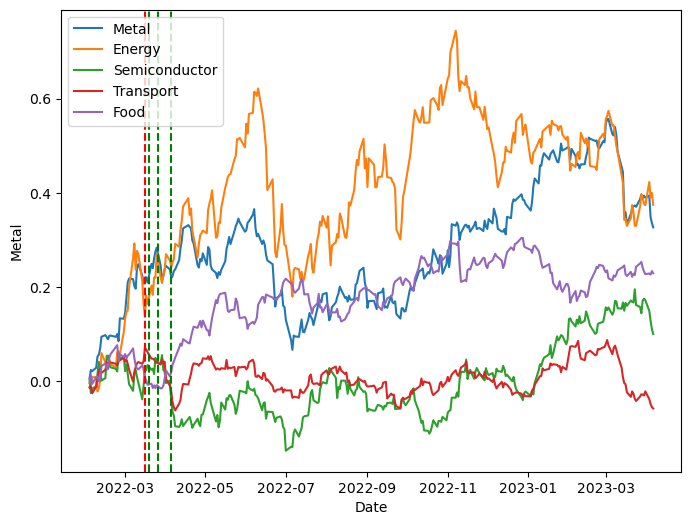

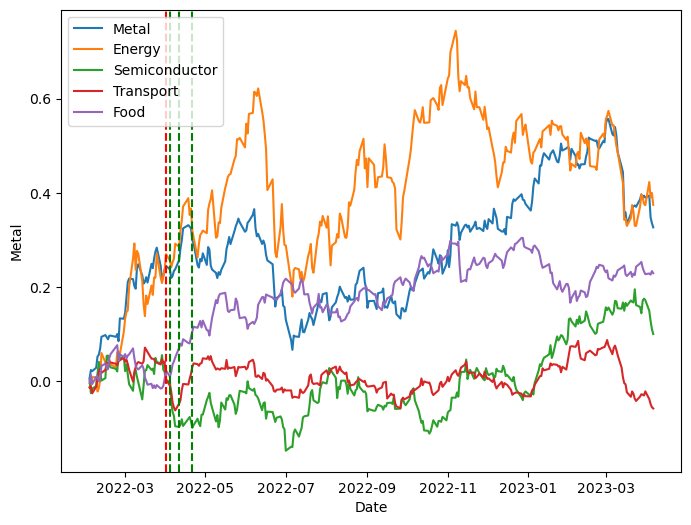

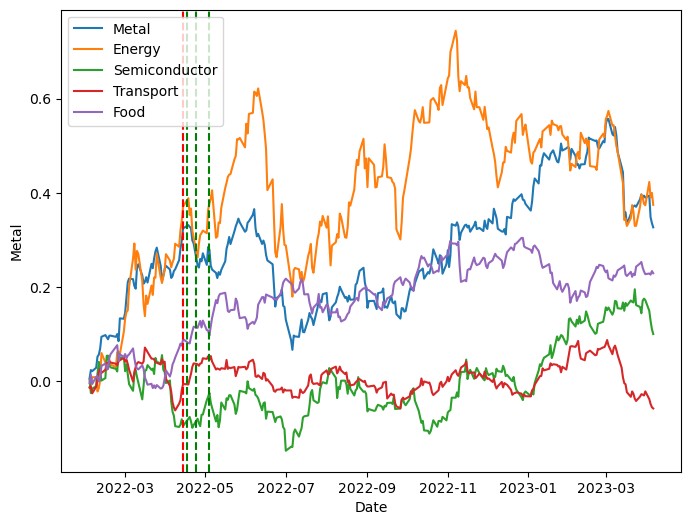

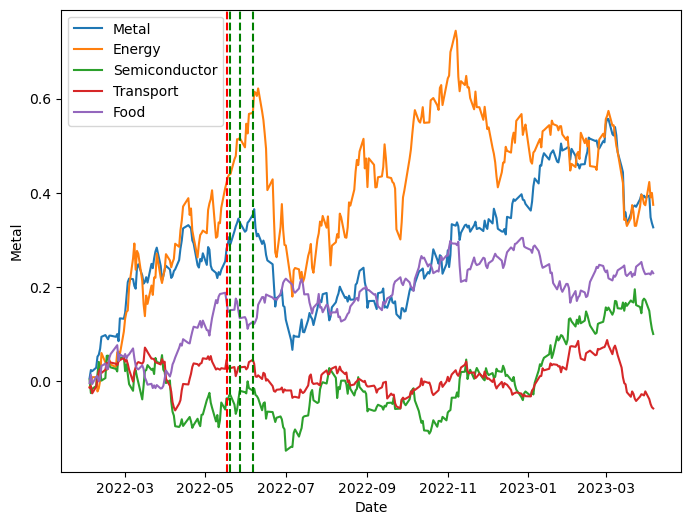

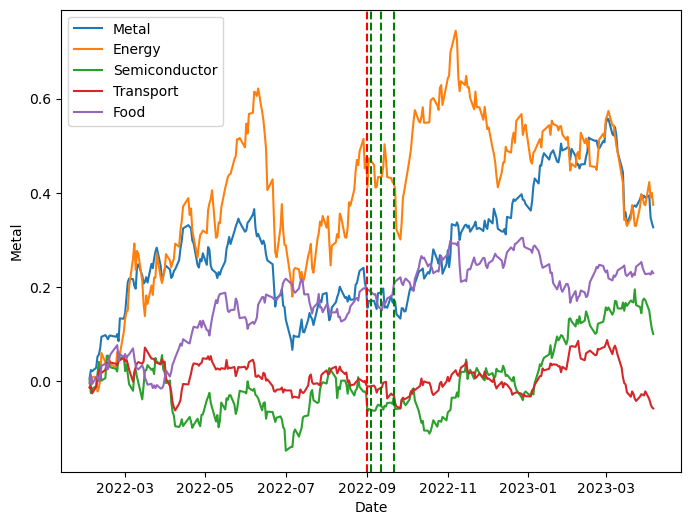

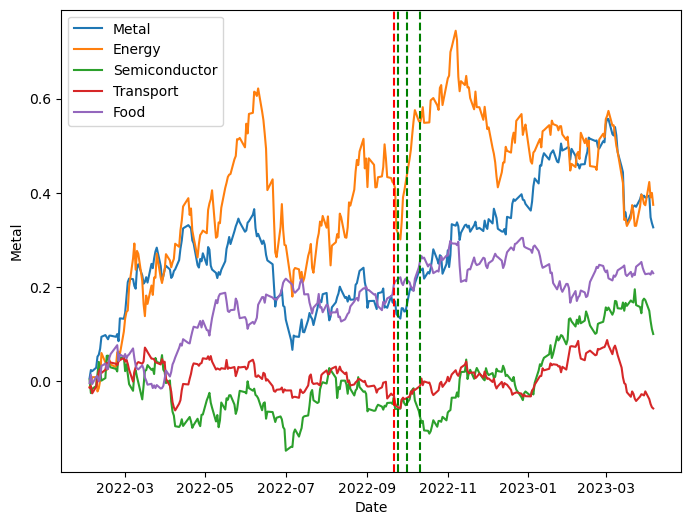

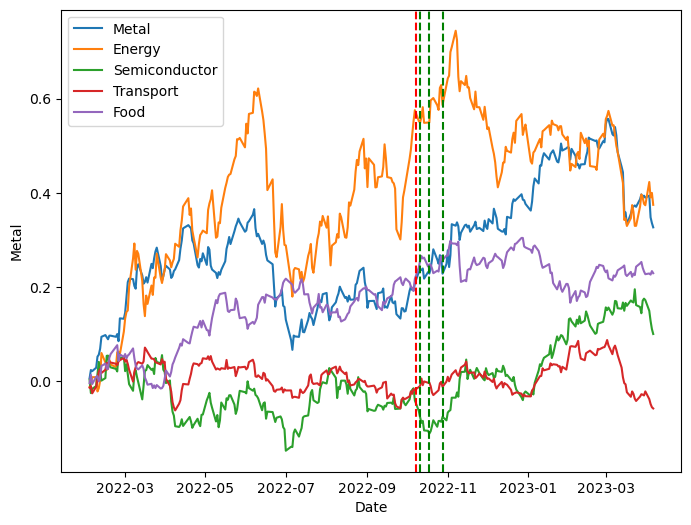

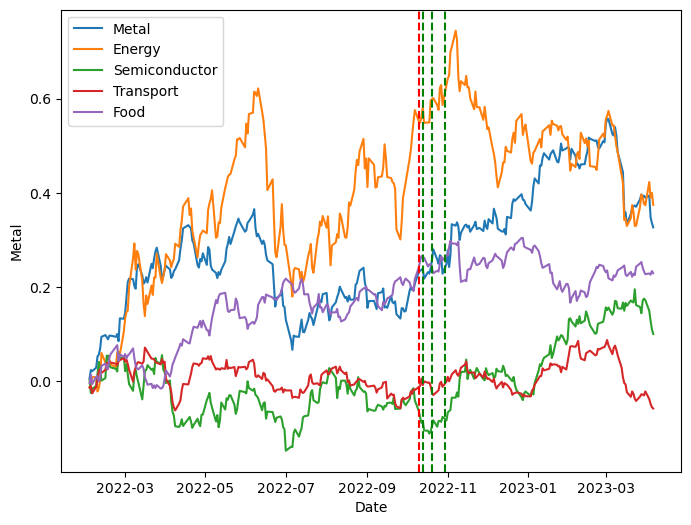

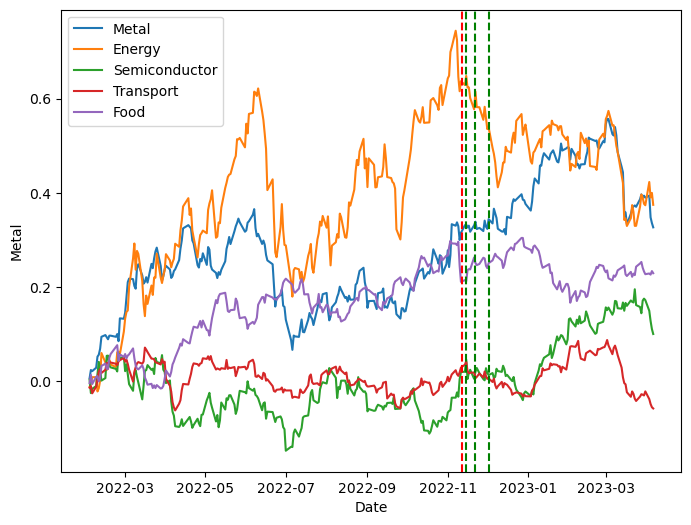

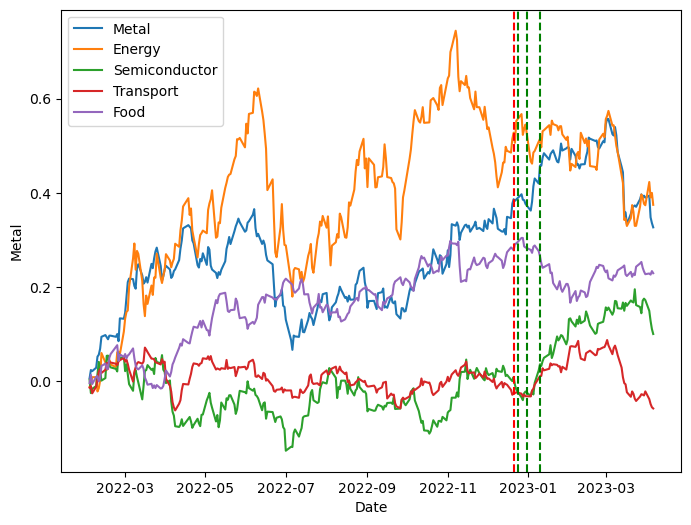

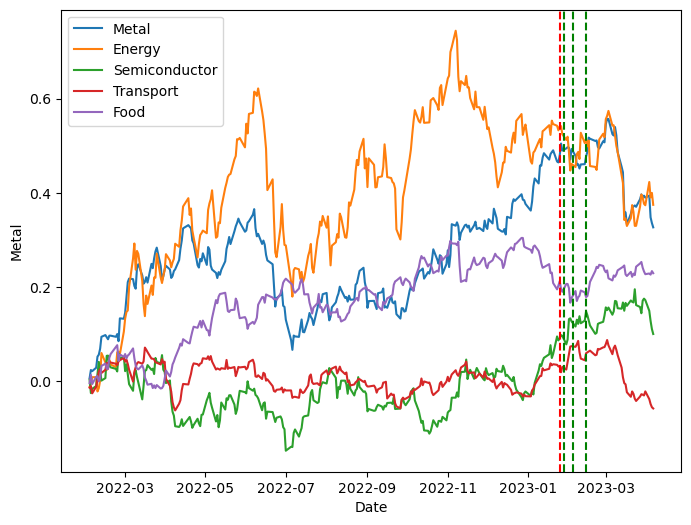

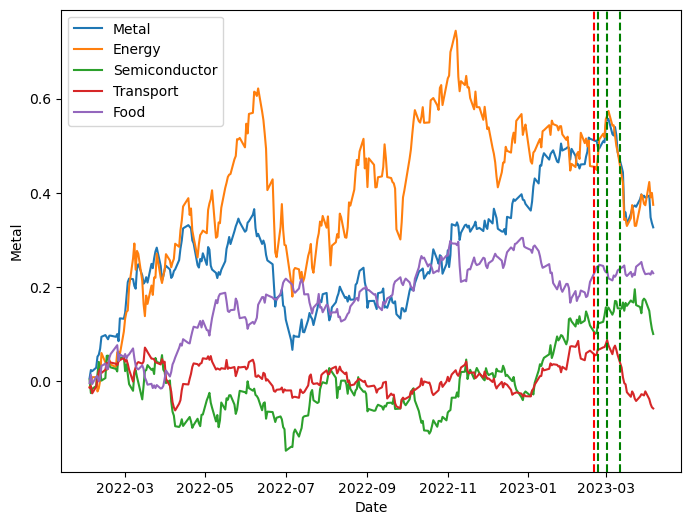

In [34]:
results_list = []
for index, row in event_dates.iterrows():
    event = row['Event']
    date = row['Date']

    # create the line plot for each industry
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.lineplot(x='Date', y='Metal', data=merged_df, label='Metal', ax=ax)
    sns.lineplot(x='Date', y='Energy', data=merged_df, label='Energy', ax=ax)
    sns.lineplot(x='Date', y='Semiconductor', data=merged_df, label='Semiconductor', ax=ax)
    sns.lineplot(x='Date', y='Transport', data=merged_df, label='Transport', ax=ax)
    sns.lineplot(x='Date', y='Food', data=merged_df, label='Food', ax=ax)

    # add vertical lines for event date and intersecting dates
    plt.axvline(date, color='red', linestyle='--', label='Event Date')
    for offset in [3, 10, 20]:
        intersect_date = date + pd.Timedelta(days=offset)
        plt.axvline(intersect_date, color='green', linestyle='--', label=f'Intersection {offset} Days After')

    #plt.xlim(date - pd.Timedelta(days=20), date + pd.Timedelta(days=20))

    # loop through the lines and calculate intersections
        # loop through the lines and calculate intersections
    lines = [line for line in ax.lines if line.get_label() in ['Metal', 'Energy', 'Semiconductor', 'Transport', 'Food']]
    for line in lines:
        if line.get_label() == 'Metal':
            for offset in [3, 10, 20]:
                intersect_date = date + pd.Timedelta(days=offset)
                metal_x = mpl_dates.date2num(intersect_date)
                metal_y = np.interp(metal_x, line.get_xdata().astype(np.float64), line.get_ydata().astype(np.float64))
                results_list.append({'Date': date, 'Industry': line.get_label(), f'ret{offset}': metal_y})
        elif line.get_label() == 'Energy':
            for offset in [3, 10, 20]:
                intersect_date = date + pd.Timedelta(days=offset)
                energy_x = mpl_dates.date2num(intersect_date)
                energy_y = np.interp(energy_x, line.get_xdata().astype(np.float64), line.get_ydata().astype(np.float64))
                results_list.append({'Date': date, 'Industry': line.get_label(), f'ret{offset}': energy_y})
        elif line.get_label() == 'Semiconductor':
            for offset in [3, 10, 20]:
                intersect_date = date + pd.Timedelta(days=offset)
                semi_x = mpl_dates.date2num(intersect_date)
                semi_y = np.interp(semi_x, line.get_xdata().astype(np.float64), line.get_ydata().astype(np.float64))
                results_list.append({'Date': date, 'Industry': line.get_label(), f'ret{offset}': semi_y})
        elif line.get_label() == 'Food':
            for offset in [3, 10, 20]:
                intersect_date = date + pd.Timedelta(days=offset)
                food_x = mpl_dates.date2num(intersect_date)
                food_y = np.interp(food_x, line.get_xdata().astype(np.float64), line.get_ydata().astype(np.float64))
                results_list.append({'Date': date, 'Industry': line.get_label(), f'ret{offset}': food_y})
        elif line.get_label() == 'Transport':
            for offset in [3, 10, 20]:
                intersect_date = date + pd.Timedelta(days=offset)
                trans_x = mpl_dates.date2num(intersect_date)
                trans_y = np.interp(trans_x, line.get_xdata().astype(np.float64), line.get_ydata().astype(np.float64))
                results_list.append({'Date': date, 'Industry': line.get_label(), f'ret{offset}': trans_y})

results_df = pd.DataFrame(results_list)
results_df.head(10)

### Cleaning Industry Returns data at times t+3, t+10, and t+20

In [35]:
# group by industry and date, and apply a custom aggregation function to the remaining columns
grouped_df = results_df.groupby(['Industry', 'Date']).agg(lambda x: np.nan if all(np.isnan(v) for v in x) else next(v for v in x if not np.isnan(v)))
grouped_df = grouped_df.reset_index()
grouped_df.head(5)

Industry       Date      ret3     ret10     ret20
0   Energy 2022-02-24  0.089197  0.240330  0.138066
1   Energy 2022-02-25  0.105108  0.260434  0.181712
2   Energy 2022-03-02  0.220226  0.251093  0.183175
3   Energy 2022-03-06  0.236702  0.138066  0.254037
4   Energy 2022-03-09  0.251093  0.177049  0.208403

### Merging Industry Returns at t, t+3, t+10, and t+20 and calculating return differences from t to t+3, t+10, and t+20

In [36]:
merged_df1 = pd.merge(grouped_df, results_df1, on=['Date', 'Industry'])
merged_df1["retDiff3"] = merged_df1["ret3"] - merged_df1["ret0"]
merged_df1["retDiff10"] = merged_df1["ret10"] - merged_df1["ret0"]
merged_df1["retDiff20"] = merged_df1["ret20"] - merged_df1["ret0"]
merged_df1 = merged_df1.drop(['ret3', 'ret10', 'ret20', 'ret0'], axis=1)
merged_df1.rename(columns = {"retDiff3": "ret3", "retDiff10": "ret10", "retDiff20": "ret20"}, inplace = True)
merged_df1.to_csv("OutputData/RetDiff1.csv")
merged_df1.head(10)

Industry       Date      ret3     ret10     ret20
0   Energy 2022-02-24  0.026396  0.177530  0.075266
1   Energy 2022-02-25  0.047732  0.203059  0.124336
2   Energy 2022-03-02  0.073229  0.104096  0.036178
3   Energy 2022-03-06 -0.003628 -0.102264  0.013706
4   Energy 2022-03-09  0.014391 -0.059654 -0.028300
5   Energy 2022-03-16  0.038982  0.115970  0.103767
6   Energy 2022-04-01 -0.013309  0.015679  0.050553
7   Energy 2022-04-14  0.013213 -0.094126  0.006420
8   Energy 2022-05-17  0.018658  0.095339  0.148617
9   Energy 2022-09-01  0.054183  0.022124  0.007925